In [1]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, matthews_corrcoef, roc_auc_score, f1_score,
                             confusion_matrix, recall_score)
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from lime import lime_tabular

# Load the dataset
# file_path = '/content/Supplementary_Tables.xlsx'
file_path = 'Supplementary_Tables.xlsx'
df = pd.read_excel(file_path, sheet_name='Supplementary Table S1',engine= 'openpyxl')

In [5]:
# Separate the target variable and the feature set
genes = df['Gene']
X = df.drop(columns=['Gene', 'Ensembl ID', 'Gene Type'])  # Dropping only non-feature columns that aren't useful for prediction
Y = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)  # Assuming 'Gene Type' is the target

# Save feature names for later
feature_names = X.columns

In [6]:
# Function to trim feature names
def trim_feature_name(name):
    # Define the logic to trim the feature name
    # For example, keeping only the prefix up to the second underscore
    parts = name.split('_')
    if len(parts) > 2:
        return f"{parts[0]}_{parts[1]}"
    else:
        return name  # Return as is if the format is unexpected

# Apply the function to all feature names
trimmed_feature_names = [trim_feature_name(name) for name in feature_names]

# Update the feature names in the dataset
X.columns = trimmed_feature_names

# Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, genes_train, genes_test = train_test_split(X, Y, genes, test_size=0.2, random_state=42)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
# Build the model
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

rf_clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = rf_clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       406
           1       0.15      0.55      0.24        20

    accuracy                           0.84       426
   macro avg       0.56      0.70      0.58       426
weighted avg       0.94      0.84      0.88       426



In [8]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.6/538.6 kB 6.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 11.2 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.13.1 requires numpy<=1.24.3,>=1.22, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.2 which is incompatible.
tensorflow-gpu 2.2.0 requires scipy==1.4.1; python_version >= "3", but you have scipy 1.10.1 which is incompatible.
tensorflow-gpu 2.2.0 requires tensorboard<2.3.0,>=2.2.0, but you have tensorboard 2.13.0 which is incompatible.
tensorflow-gpu 2.2.0 requires tensorflow-estimator<2.3.

In [10]:
!pip install numpy>=1.21



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pipdeptree 2.23.1 requires packaging>=23.1, but you have packaging 21.3 which is incompatible.

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [13]:
# Define sampling techniques
def apply_sampling(X_train, y_train, technique):
    if technique == 'RandomOverSampler':
        sampler = RandomOverSampler(random_state=42)
    elif technique == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif technique == 'ADASYN':
        sampler = ADASYN(random_state=42)
    else:
        raise ValueError("Unknown sampling technique")

    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             matthews_corrcoef, roc_auc_score, recall_score)
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import lime
from lime import lime_tabular

# Define feature selection methods
def lasso_feature_selection(X_train, y_train, X_test, feature_names):
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Define best-first search feature selection
def best_first_search_feature_selection(X_train, y_train, feature_names):
    model = RandomForestClassifier(random_state=42)
    selector = RFE(model, n_features_to_select=10)  # Specify the number of features to select
    selector = selector.fit(X_train, y_train)

    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]


In [15]:
# Evaluate the model with Grid Search and cross-validation
def evaluate_model_grid_search(X, y, model_name, feature_names):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_grid=param_grid,
                               cv=10,  # 10-fold CV
                               scoring='accuracy')

    grid_search.fit(X, y)

    print(f"Model: {model_name}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

# Lime explanation

In [17]:
# Sampling techniques to apply
# sampling_techniques = ['RandomOverSampler', 'SMOTE', 'ADASYN']
sampling_techniques = ['RandomOverSampler']
for technique in sampling_techniques:
    print(f"Applying {technique}")

    # Apply sampling technique
    X_train_resampled, y_train_resampled = apply_sampling(X_train.values, y_train.values, technique)

    # Apply best-first search for feature selection
    X_train_bfs, X_test_bfs, bfs_feature_names = best_first_search_feature_selection(X_train_resampled, y_train_resampled, trimmed_feature_names)

    # Define models with trimmed feature names
    models = {
        "Best-First Search Feature Selection": (X_train_bfs, X_test_bfs, bfs_feature_names)
    }

    for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
        model = evaluate_model_grid_search(X_train_fs, y_train_resampled, name, fs_feature_names)

        # Create a LIME explainer with trimmed feature names
        explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

        # Explain a prediction
        for i in range(2):  # Explain the first 10 instances
            exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)
            exp.show_in_notebook(show_all=False)
            print(f"Gene being explained: {genes_test.iloc[i]}")

            # Show LIME prediction and compare with actual label
            lime_prediction = model.predict([X_test_fs[i]])[0]
            actual_label = y_test.iloc[i]
            print(f"LIME Prediction: {'ASD' if lime_prediction == 1 else 'Non-ASD'}, Actual Label: {'ASD' if actual_label == 1 else 'Non-ASD'}")
            print(f"Prediction Match: {lime_prediction == actual_label}")
            print("-" * 2)

Applying RandomOverSampler


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


Model: Best-First Search Feature Selection
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy: 0.9502


Gene being explained: REEP3
LIME Prediction: Non-ASD, Actual Label: ASD
Prediction Match: False
--


Gene being explained: TNFSF11
LIME Prediction: Non-ASD, Actual Label: Non-ASD
Prediction Match: True
--


In [18]:
# Import necessary libraries
from collections import defaultdict
import numpy as np

# Dictionary to store feature importances
feature_importance_summary = defaultdict(list)

# Sampling techniques to apply
# sampling_techniques = ['RandomOverSampler', 'SMOTE', 'ADASYN']
sampling_techniques = ['RandomOverSampler']
for technique in sampling_techniques:
    print(f"Applying {technique}")

    # Apply sampling technique
    X_train_resampled, y_train_resampled = apply_sampling(X_train.values, y_train.values, technique)

    # Apply best-first search for feature selection
    X_train_bfs, X_test_bfs, bfs_feature_names = best_first_search_feature_selection(X_train_resampled, y_train_resampled, trimmed_feature_names)

    # Define models with trimmed feature names
    models = {
        "Best-First Search Feature Selection": (X_train_bfs, X_test_bfs, bfs_feature_names)
    }

    for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
        model = evaluate_model_grid_search(X_train_fs, y_train_resampled, name, fs_feature_names)

        # Create a LIME explainer with trimmed feature names
        explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

        # Explain predictions for the first 50 instances in the test set
        for i in range(5):  # Adjust the range for larger sample sizes if needed
            exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)

            # Get LIME feature importances and add them to the summary
            for feature, importance in exp.as_list():
                feature_importance_summary[feature].append(importance)

# After looping through all instances, calculate average importance for each feature
average_feature_importance = {feature: np.mean(importances) for feature, importances in feature_importance_summary.items()}
sorted_importances = sorted(average_feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Display top contributing features
print("Top contributing features to ASD prediction:")
for feature, avg_importance in sorted_importances[:10]:  # Adjust the number for more features
    print(f"Feature: {feature}, Average Importance: {avg_importance}")


Applying RandomOverSampler


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


Model: Best-First Search Feature Selection
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validated accuracy: 0.9502
Top contributing features to ASD prediction:
Feature: M1C_8yrs <= 0.60, Average Importance: 0.05492335014309474
Feature: HIP_2yrs <= 0.36, Average Importance: 0.05428448925478292
Feature: HIP_2yrs > 2.63, Average Importance: -0.05150724197235641
Feature: M1C_8yrs > 3.16, Average Importance: -0.05086567920611206
Feature: MFC_21pcw <= 0.51, Average Importance: -0.05071652250574388
Feature: OFC_8pcw <= 0.53, Average Importance: 0.04190339508018101
Feature: VFC_21yrs <= 0.57, Average Importance: -0.04097536018599875
Feature: VFC_21yrs > 3.63, Average Importance: 0.04035026380384895
Feature: 0.57 < VFC_21yrs <= 2.16, Average Importance: -0.04022912870788327
Feature: 2.16 < VFC_21yrs <= 3.63, Average Importance: 0.038173881507958675


In [24]:
# !pip install xgboost
# from xgboost import XGBClassifier
# from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, matthews_corrcoef,
#                              roc_auc_score, recall_score, classification_report)

# # Function to calculate performance metrics
# def calculate_metrics(y_true, y_pred, y_prob, model_name):
#     conf_matrix = confusion_matrix(y_true, y_pred)
#     accuracy = accuracy_score(y_true, y_pred)
#     mcc = matthews_corrcoef(y_true, y_pred)
#     roc_auc = roc_auc_score(y_true, y_prob)
#     sensitivity = recall_score(y_true, y_pred)
#     specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
#     g_mean = (sensitivity * specificity) ** 0.5

#     print(f"Model: {model_name}")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"MCC: {mcc:.4f}")
#     print(f"AUC ROC: {roc_auc:.4f}")
#     print(f"Sensitivity: {sensitivity:.4f}")
#     print(f"Specificity: {specificity:.4f}")
#     print(f"G Mean: {g_mean:.4f}")
#     print("-" * 40)

#     return accuracy, specificity, sensitivity, mcc, roc_auc

# # Function to evaluate model and calculate metrics
# def evaluate_model(X_train, X_test, y_train, y_test, model_name):
#     model = RandomForestClassifier(random_state=42)
#     # model = XGBClassifier(random_state=42)
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (ASD)

#     return calculate_metrics(y_test, y_pred, y_prob, model_name)

# # Sampling techniques to apply
# sampling_techniques = ['RandomOverSampler', 'SMOTE', 'ADASYN']

# for technique in sampling_techniques:
#     print(f"Applying {technique}")

#     # Apply sampling technique
#     X_train_resampled, y_train_resampled = apply_sampling(X_train.values, y_train.values, technique)

#     # Full feature set evaluation
#     print("Evaluating on Full Feature Set")
#     evaluate_model(X_train_resampled, X_test, y_train_resampled, y_test, "Full Feature Set")

# #     # Lasso feature selection
#     X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train_resampled, y_train_resampled, X_test, trimmed_feature_names, prefit=True)
#     print("Evaluating after Lasso Feature Selection")
#     evaluate_model(X_train_lasso, X_test_lasso, y_train_resampled, y_test, "Lasso Feature Selection")

#     # Random Forest feature selection
#     X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train_resampled, y_train_resampled, X_test, trimmed_feature_names)
#     print("Evaluating after Random Forest Feature Selection")
#     evaluate_model(X_train_rf, X_test_rf, y_train_resampled, y_test, "Random Forest Feature Selection")

#     # Best-First Search feature selection
#     X_train_bfs, X_test_bfs, bfs_feature_names = best_first_search_feature_selection(X_train_resampled, y_train_resampled, trimmed_feature_names)
#     print("Evaluating after Best-First Search Feature Selection")
#     evaluate_model(X_train_bfs, X_test_bfs, y_train_resampled, y_test, "Best-First Search Feature Selection")


Defaulting to user installation because normal site-packages is not writeable
Applying RandomOverSampler
Evaluating on Full Feature Set


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model: Full Feature Set
Accuracy: 0.8521
MCC: 0.3984
AUC ROC: 0.8462
Sensitivity: 0.3944
Specificity: 0.3944
G Mean: 0.3944
----------------------------------------


ValueError: Either fit the model before transform or set "prefit=True" while passing the fitted estimator to the constructor.

# Feature Selection Techniques

In [28]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, matthews_corrcoef,
                             roc_auc_score, recall_score, classification_report)
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Function to apply sampling
def apply_sampling(X_train, y_train, technique):
    if y_train.name is None:
        y_train.name = 'target'
    
    if technique == 'RandomOverSampler':
        sampler = RandomOverSampler(random_state=42)
    elif technique == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif technique == 'ADASYN':
        sampler = ADASYN(random_state=42)
    else:
        raise ValueError("Unknown sampling technique")
    
    return sampler.fit_resample(X_train.values, y_train.values)

# Lasso feature selection (assumed correct elsewhere)
def lasso_feature_selection(X_train, y_train, X_test, feature_names, prefit=False):
    from sklearn.linear_model import LassoCV
    lasso_model = LassoCV(cv=5, random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean', prefit=True)
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Random Forest feature selection (FIXED)
def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean', prefit=True)
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Placeholder for Best-First Search feature selection
def best_first_search_feature_selection(X_train, y_train, feature_names):
    # Dummy logic for demonstration
    from sklearn.feature_selection import SelectKBest, f_classif
    selector = SelectKBest(score_func=f_classif, k=10)
    selector.fit(X_train, y_train)
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred, y_prob, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    sensitivity = recall_score(y_true, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    return accuracy, specificity, sensitivity, mcc, roc_auc

# Function to evaluate model and calculate metrics
def evaluate_model(X_train, X_test, y_train, y_test, model_name):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1
    return calculate_metrics(y_test, y_pred, y_prob, model_name)

# Main loop
sampling_techniques = ['RandomOverSampler', 'SMOTE', 'ADASYN']

# Set y_train.name if missing
y_train.name = 'target'

for technique in sampling_techniques:
    print(f"Applying {technique}")

    # Apply sampling
    X_train_resampled, y_train_resampled = apply_sampling(X_train, y_train, technique)

    # Full feature set evaluation
    print("Evaluating on Full Feature Set")
    evaluate_model(X_train_resampled, X_test, y_train_resampled, y_test, "Full Feature Set")

    # Lasso
    X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(
        X_train_resampled, y_train_resampled, X_test, trimmed_feature_names
    )
    print("Evaluating after Lasso Feature Selection")
    evaluate_model(X_train_lasso, X_test_lasso, y_train_resampled, y_test, "Lasso Feature Selection")

    # RF
    X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(
        X_train_resampled, y_train_resampled, X_test, trimmed_feature_names
    )
    print("Evaluating after Random Forest Feature Selection")
    evaluate_model(X_train_rf, X_test_rf, y_train_resampled, y_test, "Random Forest Feature Selection")

    # BFS
    X_train_bfs, X_test_bfs, bfs_feature_names = best_first_search_feature_selection(
        X_train_resampled, y_train_resampled, trimmed_feature_names
    )
    print("Evaluating after Best-First Search Feature Selection")
    evaluate_model(X_train_bfs, X_test_bfs, y_train_resampled, y_test, "Best-First Search Feature Selection")


Applying RandomOverSampler
Evaluating on Full Feature Set


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model: Full Feature Set
Accuracy: 0.8521
MCC: 0.3984
AUC ROC: 0.8462
Sensitivity: 0.3944
Specificity: 0.3944
G Mean: 0.3944
----------------------------------------


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09737053977960386, tolerance: 0.05487534429142603
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11393782219658988, tolerance: 0.05487534429142603
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09895846323854585, tolerance: 0.05487534429142603
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/s

Evaluating after Lasso Feature Selection
Model: Lasso Feature Selection
Accuracy: 0.8427
MCC: 0.3518
AUC ROC: 0.8293
Sensitivity: 0.3521
Specificity: 0.3521
G Mean: 0.3521
----------------------------------------


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Evaluating after Random Forest Feature Selection
Model: Random Forest Feature Selection
Accuracy: 0.8568
MCC: 0.4527
AUC ROC: 0.8435
Sensitivity: 0.4930
Specificity: 0.4930
G Mean: 0.4930
----------------------------------------
Evaluating after Best-First Search Feature Selection


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


Model: Best-First Search Feature Selection
Accuracy: 0.8122
MCC: 0.2683
AUC ROC: 0.7762
Sensitivity: 0.3380
Specificity: 0.3380
G Mean: 0.3380
----------------------------------------
Applying SMOTE
Evaluating on Full Feature Set


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model: Full Feature Set
Accuracy: 0.8028
MCC: 0.3663
AUC ROC: 0.8299
Sensitivity: 0.5493
Specificity: 0.5493
G Mean: 0.5493
----------------------------------------


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12457072408051317, tolerance: 0.05487534429142603
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17645534962946385, tolerance: 0.05487534429142603
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15704179223860137, tolerance: 0.05487534429142603
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/s

Evaluating after Lasso Feature Selection
Model: Lasso Feature Selection
Accuracy: 0.8239
MCC: 0.4253
AUC ROC: 0.8324
Sensitivity: 0.5915
Specificity: 0.5915
G Mean: 0.5915
----------------------------------------


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Evaluating after Random Forest Feature Selection
Model: Random Forest Feature Selection
Accuracy: 0.8028
MCC: 0.3663
AUC ROC: 0.8336
Sensitivity: 0.5493
Specificity: 0.5493
G Mean: 0.5493
----------------------------------------
Evaluating after Best-First Search Feature Selection


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


Model: Best-First Search Feature Selection
Accuracy: 0.6948
MCC: 0.2664
AUC ROC: 0.7644
Sensitivity: 0.6338
Specificity: 0.6338
G Mean: 0.6338
----------------------------------------
Applying ADASYN
Evaluating on Full Feature Set


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1757794776098649, tolerance: 0.05430149118843201
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12839812494036096, tolerance: 0.05430149118843201
  model = cd_fast.enet_coordinate_d

Model: Full Feature Set
Accuracy: 0.8146
MCC: 0.3799
AUC ROC: 0.8260
Sensitivity: 0.5352
Specificity: 0.5352
G Mean: 0.5352
----------------------------------------


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2617985750892444, tolerance: 0.05430149118843201
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2466262064128273, tolerance: 0.05430149118843201
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2950212302959585, tolerance: 0.05430149118843201
  model = cd_fast.enet_coordinate_descent_gram(
/opt/apps/anaconda3/2020.11/lib/python3.8/site

Evaluating after Lasso Feature Selection
Model: Lasso Feature Selection
Accuracy: 0.8122
MCC: 0.3828
AUC ROC: 0.8289
Sensitivity: 0.5493
Specificity: 0.5493
G Mean: 0.5493
----------------------------------------


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Evaluating after Random Forest Feature Selection
Model: Random Forest Feature Selection
Accuracy: 0.8099
MCC: 0.4000
AUC ROC: 0.8338
Sensitivity: 0.5915
Specificity: 0.5915
G Mean: 0.5915
----------------------------------------
Evaluating after Best-First Search Feature Selection


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


Model: Best-First Search Feature Selection
Accuracy: 0.7254
MCC: 0.2542
AUC ROC: 0.7491
Sensitivity: 0.5493
Specificity: 0.5493
G Mean: 0.5493
----------------------------------------


Evaluating on Full Feature Set


/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/apps/anaconda3/2020.11/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model: Full Feature Set
Accuracy: 0.8146
MCC: 0.3799
AUC ROC: 0.8260
Sensitivity: 0.5352
Specificity: 0.5352
G Mean: 0.5352
----------------------------------------
Evaluating after Random Forest Feature Selection
Model: Random Forest Feature Selection
Accuracy: 0.8099
MCC: 0.4000
AUC ROC: 0.8338
Sensitivity: 0.5915
Specificity: 0.5915
G Mean: 0.5915
----------------------------------------


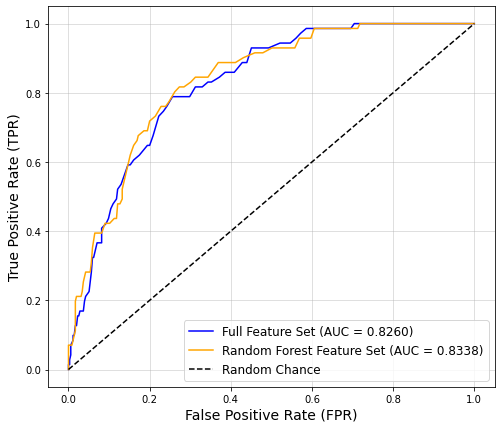

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot AUC-ROC curve
def plot_auc_roc(y_true, y_prob, label, color, linestyle='-'):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.4f})', color=color, linestyle=linestyle)

# Function to evaluate model and plot AUC-ROC curve
def evaluate_and_plot_roc(X_train, X_test, y_train, y_test, model_name, label, color, linestyle='-'):
    model = RandomForestClassifier(random_state=42)
    # model = XGBClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1 (ASD)

    # Calculate metrics
    calculate_metrics(y_test, y_pred, y_prob, model_name)

    # Plot AUC-ROC
    plot_auc_roc(y_test, y_prob, label, color, linestyle)

# Plotting AUC-ROC curves for different feature sets
plt.figure(figsize=(8, 7))

# Full feature set
print("Evaluating on Full Feature Set")
evaluate_and_plot_roc(X_train_resampled, X_test, y_train_resampled, y_test,
                      "Full Feature Set", label="Full Feature Set", color='blue')

# Lasso feature selection
# print("Evaluating after Lasso Feature Selection")
# evaluate_and_plot_roc(X_train_lasso, X_test_lasso, y_train_resampled, y_test,
#                       "Lasso Feature Selection", label="Lasso Feature Set", color='green')

# Random Forest feature selection
print("Evaluating after Random Forest Feature Selection")
evaluate_and_plot_roc(X_train_rf, X_test_rf, y_train_resampled, y_test,
                      "Random Forest Feature Selection", label="Random Forest Feature Set", color='orange')

# Best-First Search feature selection
# print("Evaluating after Best-First Search Feature Selection")
# evaluate_and_plot_roc(X_train_bfs, X_test_bfs, y_train_resampled, y_test,
#                       "Best-First Search Feature Selection", label="Best-First Search Feature Set", color='red')

# Finalize the plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
# plt.title('AUC-ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


# 10 fold Cross-validation

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef, roc_auc_score, recall_score

# Function to calculate performance metrics with standard deviation and mean
def calculate_metrics_with_std(y_true, y_pred, y_prob, model_name):
    # Calculate confusion matrix and other metrics
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    sensitivity = recall_score(y_true, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    # Print the metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    return accuracy, specificity, sensitivity, mcc, roc_auc, g_mean

# Include standard deviation and mean for GridSearchCV cross-validation
def evaluate_grid_search_with_cv(X_train, y_train, X_test, y_test, model_name):
    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Initialize Random Forest
    rf_model = RandomForestClassifier(random_state=42)

    # GridSearchCV for hyperparameter tuning with 10-fold cross-validation
    grid_search = GridSearchCV(estimator=rf_model,
                               param_grid=param_grid,
                               cv=10,  # 10-fold cross-validation
                               scoring='accuracy',
                               return_train_score=True)  # To access train score for each fold

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Extract results from GridSearchCV
    mean_score = grid_search.best_score_  # Best cross-validated accuracy
    std_dev_score = grid_search.cv_results_['std_test_score'][grid_search.best_index_]  # Standard deviation of the best model

    # Print the best parameters and the mean and std of cross-validation
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy: {mean_score:.4f}")
    print(f"Standard deviation of cross-validation accuracy: {std_dev_score:.4f}")

    # Use the best estimator from GridSearchCV for evaluation on test data
    best_rf_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    y_pred_rf = best_rf_model.predict(X_test)
    y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]  # Probability for class 1 (ASD)

    # Calculate and display the metrics including standard deviation and mean for the test set
    accuracy, specificity, sensitivity, mcc, roc_auc, g_mean = calculate_metrics_with_std(
        y_test, y_pred_rf, y_prob_rf, "Random Forest with Grid Search (10-fold CV)")

    return best_rf_model, mean_score, std_dev_score

# Example usage
best_rf_model, mean_accuracy, std_accuracy = evaluate_grid_search_with_cv(
    X_train_rf, y_train_resampled, X_test_rf, y_test, "Random Forest"
)

print(f"Mean Accuracy from CV: {mean_accuracy:.4f}")
print(f"Standard Deviation from CV: {std_accuracy:.4f}")


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated accuracy: 0.8955
Standard deviation of cross-validation accuracy: 0.0272
Model: Random Forest with Grid Search (10-fold CV)
Accuracy: 0.8216
MCC: 0.4481
AUC ROC: 0.8351
Sensitivity: 0.6479
Specificity: 0.6479
G Mean: 0.6479
----------------------------------------
Mean Accuracy from CV: 0.8955
Standard Deviation from CV: 0.0272


In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, matthews_corrcoef,
    roc_auc_score, recall_score
)
import numpy as np

# Function to compute all metrics
def compute_metrics(y_true, y_pred, y_prob):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    sensitivity = recall_score(y_true, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5
    return accuracy, specificity, sensitivity, mcc, roc_auc, g_mean

# Function to evaluate all metrics using manual CV
def evaluate_all_metrics_cv(X, y, model, cv=10):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    metrics = {
        'accuracy': [], 'specificity': [], 'sensitivity': [],
        'mcc': [], 'roc_auc': [], 'g_mean': []
    }

    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        y_prob = model.predict_proba(X_val_fold)[:, 1]

        acc, spec, sens, mcc, auc, gmean = compute_metrics(y_val_fold, y_pred, y_prob)
        metrics['accuracy'].append(acc)
        metrics['specificity'].append(spec)
        metrics['sensitivity'].append(sens)
        metrics['mcc'].append(mcc)
        metrics['roc_auc'].append(auc)
        metrics['g_mean'].append(gmean)

    # Print mean and std of each metric
    print("Cross-Validation Metrics (Mean ± Std):")
    for key in metrics:
        mean_val = np.mean(metrics[key])
        std_val = np.std(metrics[key])
        print(f"{key.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")
    
    return metrics

# Example usage with RandomForestClassifier and GridSearch best params
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Sample split if needed
# X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming X_train_rf and y_train_resampled are defined
best_rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)

# Evaluate metrics with mean and std over CV folds
metrics_cv = evaluate_all_metrics_cv(X_train_rf, y_train_resampled, best_rf, cv=10)


Cross-Validation Metrics (Mean ± Std):
Accuracy: 0.9086 ± 0.0172
Specificity: 0.9669 ± 0.0140
Sensitivity: 0.9669 ± 0.0140
Mcc: 0.8233 ± 0.0333
Roc_auc: 0.9720 ± 0.0065
G_mean: 0.9669 ± 0.0140


#CV=10 for all metrices(accuracy,sensitivity, specificity, MCC, AUCROC)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef, roc_auc_score, recall_score

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred, y_prob):
    conf_matrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    sensitivity = recall_score(y_true, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5
    return accuracy, specificity, sensitivity, mcc, roc_auc, g_mean

# Function to run GridSearchCV and calculate mean and std deviation for all metrics
def evaluate_grid_search_with_cv(X_train, y_train, X_test, y_test, model_name):
    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # GridSearchCV for hyperparameter tuning with 10-fold cross-validation
    grid_search = GridSearchCV(estimator=rf_model,
                               param_grid=param_grid,
                               cv=10,  # 10-fold cross-validation
                               scoring='accuracy',
                               return_train_score=True)  # To access train score for each fold

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Extract results from GridSearchCV
    best_model = grid_search.best_estimator_

    # Store metrics for each fold
    all_metrics = {
        'accuracy': [],
        'specificity': [],
        'sensitivity': [],
        'mcc': [],
        'roc_auc': [],
        'g_mean': []
    }

    # Cross-validation loop to get metrics for each fold
    for train_index, val_index in grid_search.cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Train the model on the fold
        best_model.fit(X_train_fold, y_train_fold)

        # Get predictions and probabilities for validation fold
        y_pred_fold = best_model.predict(X_val_fold)
        y_prob_fold = best_model.predict_proba(X_val_fold)[:, 1]  # Probability for class 1 (ASD)

        # Calculate metrics for this fold
        fold_metrics = calculate_metrics(y_val_fold, y_pred_fold, y_prob_fold)

        # Append metrics to the list
        all_metrics['accuracy'].append(fold_metrics[0])
        all_metrics['specificity'].append(fold_metrics[1])
        all_metrics['sensitivity'].append(fold_metrics[2])
        all_metrics['mcc'].append(fold_metrics[3])
        all_metrics['roc_auc'].append(fold_metrics[4])
        all_metrics['g_mean'].append(fold_metrics[5])

    # Compute mean and standard deviation for each metric across all folds
    mean_metrics = {metric: np.mean(values) for metric, values in all_metrics.items()}
    std_metrics = {metric: np.std(values) for metric, values in all_metrics.items()}

    # Print results
    print(f"Model: {model_name}")
    for metric in mean_metrics:
        print(f"{metric.capitalize()} - Mean: {mean_metrics[metric]:.4f}, Std: {std_metrics[metric]:.4f}")

    # Evaluate the best model on the test set
    y_pred_test = best_model.predict(X_test)
    y_prob_test = best_model.predict_proba(X_test)[:, 1]  # Probability for class 1 (ASD)

    # Calculate and display metrics for the test set
    test_metrics = calculate_metrics(y_test, y_pred_test, y_prob_test)
    print(f"\nTest Set Metrics: {model_name}")
    print(f"Accuracy: {test_metrics[0]:.4f}")
    print(f"Sensitivity: {test_metrics[2]:.4f}")
    print(f"Specificity: {test_metrics[1]:.4f}")
    print(f"MCC: {test_metrics[3]:.4f}")
    print(f"AUC ROC: {test_metrics[4]:.4f}")
    print(f"G Mean: {test_metrics[5]:.4f}")
    print("-" * 40)

    return best_model, mean_metrics, std_metrics

# Example usage
best_rf_model, mean_metrics, std_metrics = evaluate_grid_search_with_cv(
    X_train_rf, y_train_resampled, X_test_rf, y_test, "Random Forest"
)


AttributeError: 'int' object has no attribute 'split'

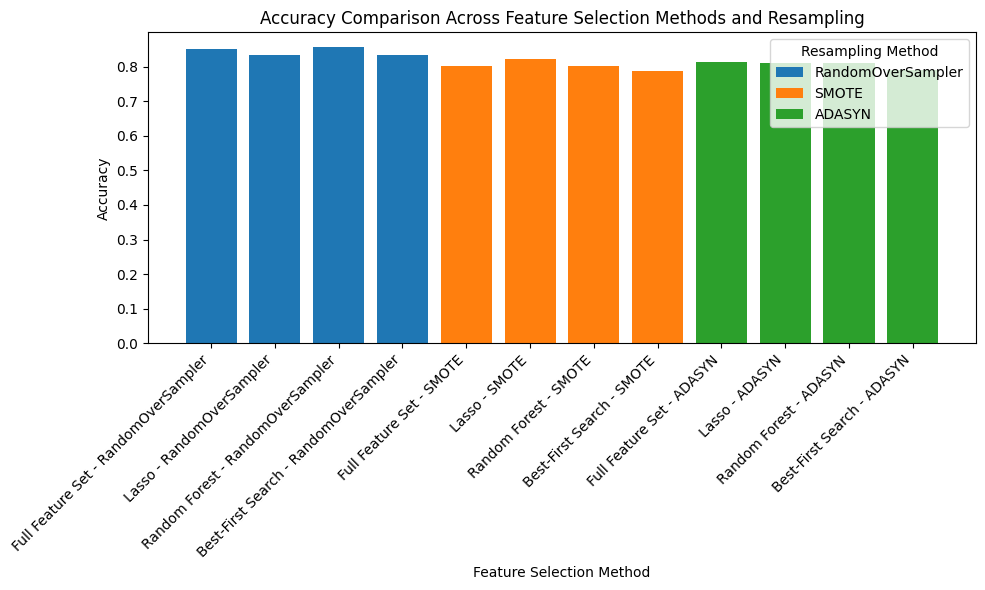

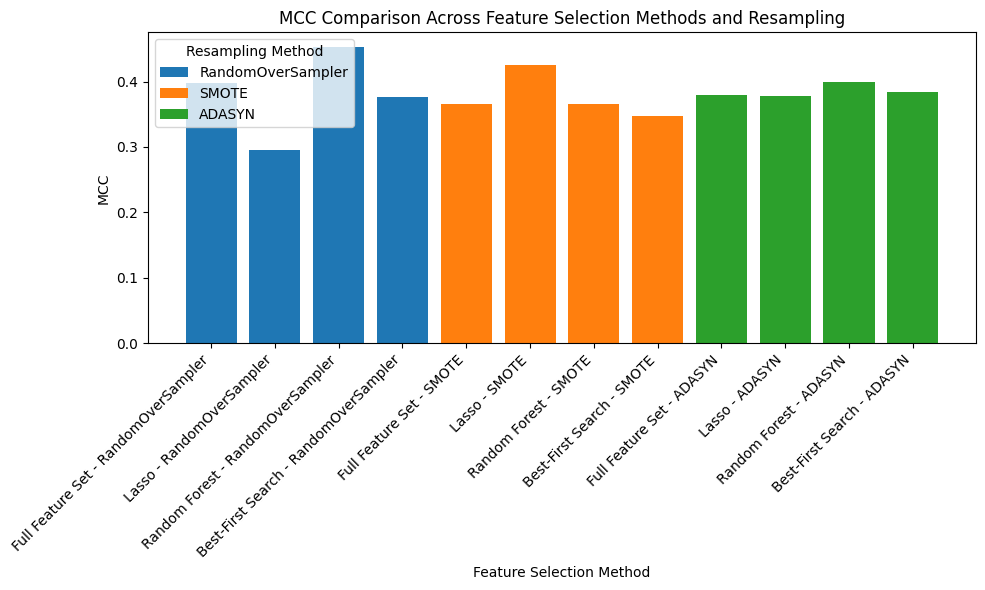

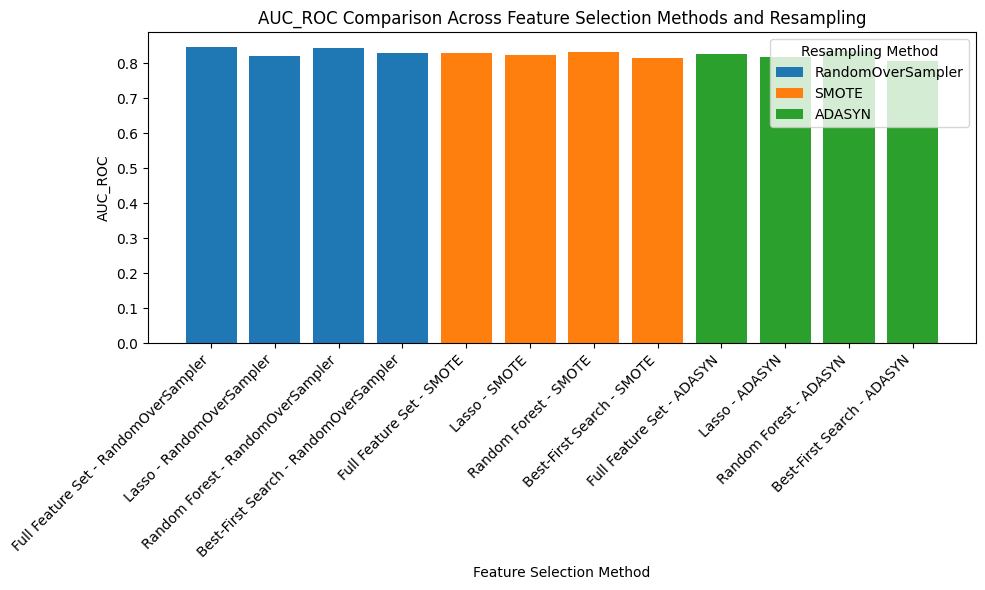

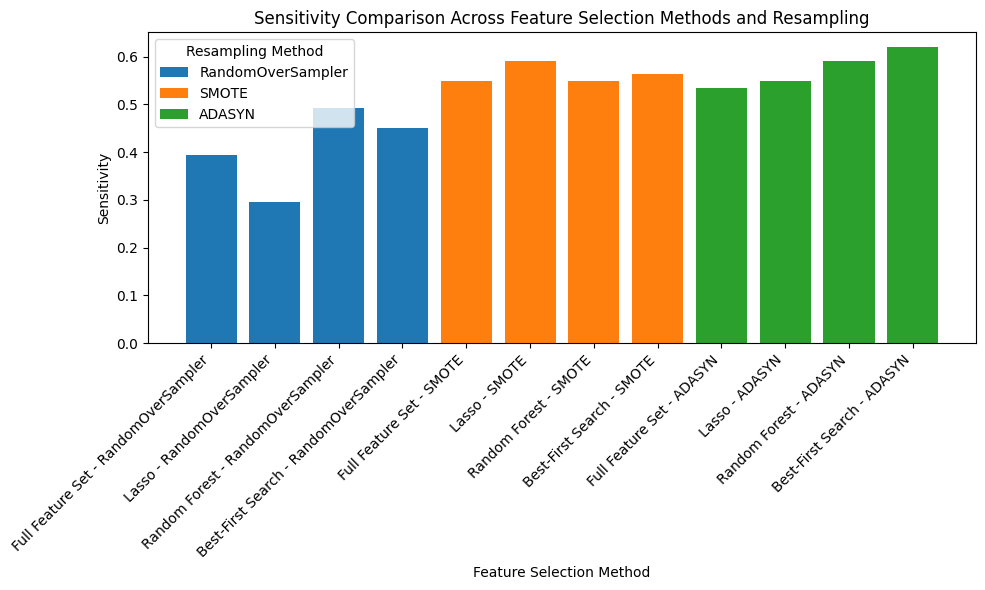

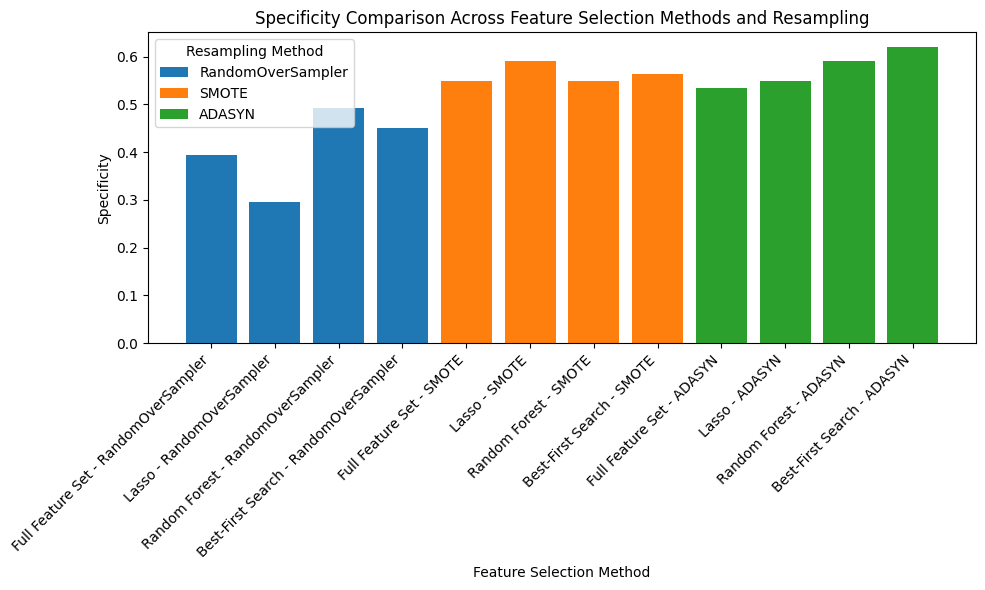

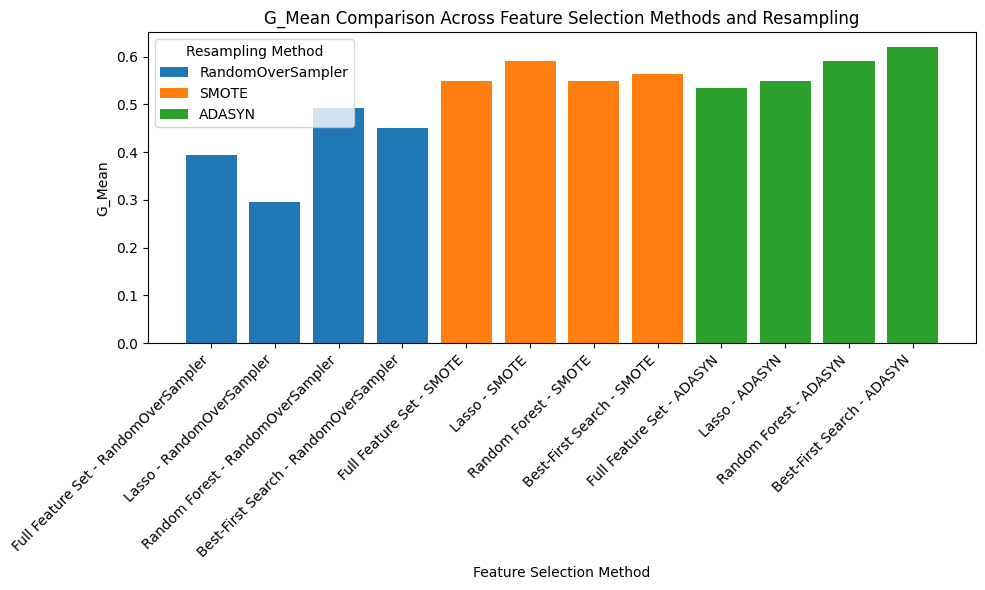

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data based on the provided text
data = {
    'Resampling': [
        'RandomOverSampler', 'RandomOverSampler', 'RandomOverSampler', 'RandomOverSampler',
        'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE',
        'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN'
    ],
    'Feature_Selection': [
        'Full Feature Set', 'Lasso', 'Random Forest', 'Best-First Search',
        'Full Feature Set', 'Lasso', 'Random Forest', 'Best-First Search',
        'Full Feature Set', 'Lasso', 'Random Forest', 'Best-First Search'
    ],
    'Accuracy': [0.8521, 0.8333, 0.8568, 0.8333, 0.8028, 0.8239, 0.8028, 0.7864, 0.8146, 0.8099, 0.8099, 0.7911],
    'MCC': [0.3984, 0.2958, 0.4527, 0.3761, 0.3663, 0.4253, 0.3663, 0.3468, 0.3799, 0.3786, 0.4000, 0.3837],
    'AUC_ROC': [0.8462, 0.8201, 0.8435, 0.8286, 0.8299, 0.8248, 0.8336, 0.8157, 0.8260, 0.8175, 0.8338, 0.8060],
    'Sensitivity': [0.3944, 0.2958, 0.4930, 0.4507, 0.5493, 0.5915, 0.5493, 0.5634, 0.5352, 0.5493, 0.5915, 0.6197],
    'Specificity': [0.3944, 0.2958, 0.4930, 0.4507, 0.5493, 0.5915, 0.5493, 0.5634, 0.5352, 0.5493, 0.5915, 0.6197],
    'G_Mean': [0.3944, 0.2958, 0.4930, 0.4507, 0.5493, 0.5915, 0.5493, 0.5634, 0.5352, 0.5493, 0.5915, 0.6197]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set up the plot for each metric
metrics = ['Accuracy', 'MCC', 'AUC_ROC', 'Sensitivity', 'Specificity', 'G_Mean']
feature_selections = df['Feature_Selection'].unique()
resampling_methods = df['Resampling'].unique()

# Plot each metric in a separate figure
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for resampling in resampling_methods:
        subset = df[df['Resampling'] == resampling]
        plt.bar(subset['Feature_Selection'] + ' - ' + resampling, subset[metric], label=resampling)

    # Add title and labels
    plt.title(f'{metric} Comparison Across Feature Selection Methods and Resampling')
    plt.xlabel('Feature Selection Method')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Resampling Method")
    plt.tight_layout()

# Show the plots
plt.show()


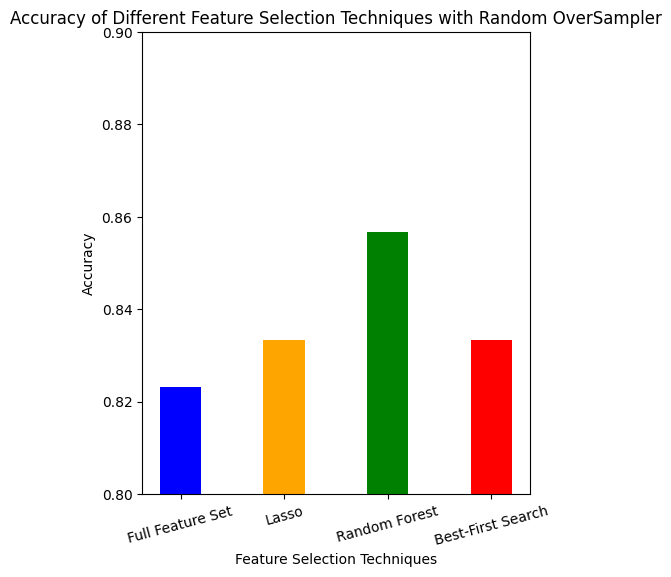

In [ ]:
import matplotlib.pyplot as plt

# Feature selection techniques and their respective accuracies with Random OverSampler
techniques = ['Full Feature Set', 'Lasso', 'Random Forest', 'Best-First Search']
accuracies = [0.8232, 0.8333, 0.8568, 0.8333]

# Plotting the bar chart
plt.figure(figsize=(5, 6))
plt.bar(techniques, accuracies, color=['blue', 'orange', 'green', 'red'], width=0.4)

# Adding labels and title
plt.xlabel('Feature Selection Techniques')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Feature Selection Techniques with Random OverSampler')
plt.ylim(0.8, 0.9)  # Setting y-axis limit for better visualization
plt.xticks(rotation=15)
# plt.grid(axis='y', linestyle='--', alpha=0.1)

plt.show()


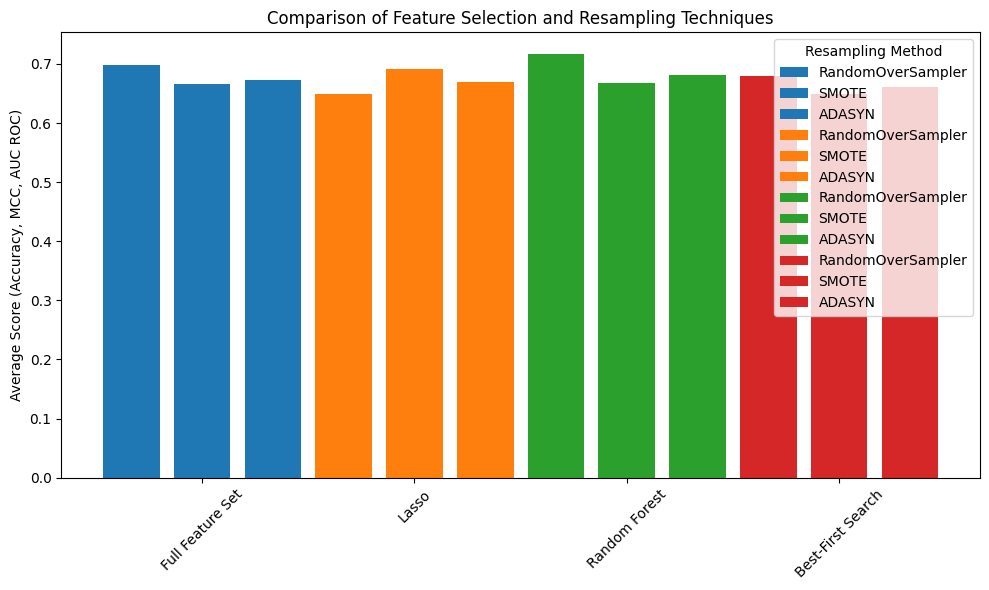

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data based on your output, with columns for each metric
data = {
    'Resampling': [
        'RandomOverSampler', 'RandomOverSampler', 'RandomOverSampler', 'RandomOverSampler',
        'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE',
        'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN'
    ],
    'Feature_Selection': [
        'Full Feature Set', 'Lasso', 'Random Forest', 'Best-First Search',
        'Full Feature Set', 'Lasso', 'Random Forest', 'Best-First Search',
        'Full Feature Set', 'Lasso', 'Random Forest', 'Best-First Search'
    ],
    'Accuracy': [0.8521, 0.8333, 0.8568, 0.8333, 0.8028, 0.8239, 0.8028, 0.7864, 0.8146, 0.8099, 0.8099, 0.7911],
    'MCC': [0.3984, 0.2958, 0.4527, 0.3761, 0.3663, 0.4253, 0.3663, 0.3468, 0.3799, 0.3786, 0.4000, 0.3837],
    'AUC_ROC': [0.8462, 0.8201, 0.8435, 0.8286, 0.8299, 0.8248, 0.8336, 0.8157, 0.8260, 0.8175, 0.8338, 0.8060],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate an "average score" across the key metrics for each combination of resampling and feature selection
df['Average_Score'] = df[['Accuracy', 'MCC', 'AUC_ROC']].mean(axis=1)

# Plot average scores to identify the best-performing combination
fig, ax = plt.subplots(figsize=(10, 6))

# Use a bar plot where feature selections are grouped and resampling techniques are compared within each group
for idx, feature_selection in enumerate(df['Feature_Selection'].unique()):
    subset = df[df['Feature_Selection'] == feature_selection]
    ax.bar([idx*3 + i for i in range(len(subset))], subset['Average_Score'], label=subset['Resampling'].values)

# Set labels and title
ax.set_xticks([i*3+1 for i in range(len(df['Feature_Selection'].unique()))])
ax.set_xticklabels(df['Feature_Selection'].unique(), rotation=45)
ax.set_ylabel('Average Score (Accuracy, MCC, AUC ROC)')
ax.set_title('Comparison of Feature Selection and Resampling Techniques')
ax.legend(title="Resampling Method")

# Display plot
plt.tight_layout()
plt.show()


In [ ]:


        # Create a LIME explainer with trimmed feature names
        explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

        # Explain a prediction
        for i in range(10):  # Explain the first 10 instances
            exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)
            exp.show_in_notebook(show_all=False)
            print(f"Gene being explained: {genes_test.iloc[i]}")

            # Show LIME prediction and compare with actual label
            lime_prediction = model.predict([X_test_fs[i]])[0]
            actual_label = y_test.iloc[i]
            print(f"LIME Prediction: {'ASD' if lime_prediction == 1 else 'Non-ASD'}, Actual Label: {'ASD' if actual_label == 1 else 'Non-ASD'}")
            print(f"Prediction Match: {lime_prediction == actual_label}")
            print("-" * 40)


In [ ]:

# Define feature selection methods
def lasso_feature_selection(X_train, y_train, X_test, feature_names):
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Define PCA transformation and fit on data
def fit_pca(X_train, X_test):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    # Find out how many components were selected
    num_components = pca.n_components_
    print(f"Number of components retained: {num_components}")

    # Plot the cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_train_pca, X_test_pca

# Evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, model_name, feature_names):
    if model_name == "Random Forest with Grid Search":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-ASD', 'ASD'], yticklabels=['Non-ASD', 'ASD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return model

# Sampling techniques to apply
sampling_techniques = ['RandomOverSampler', 'SMOTE', 'ADASYN']

for technique in sampling_techniques:
    print(f"Applying {technique}")

    # Apply sampling technique
    X_train_resampled, y_train_resampled = apply_sampling(X_train, y_train, technique)

    # Apply feature selection methods
    X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train_resampled, y_train_resampled, X_test, trimmed_feature_names)
    X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train_resampled, y_train_resampled, X_test, trimmed_feature_names)

    # Apply PCA
    X_train_pca, X_test_pca = fit_pca(X_train_resampled, X_test)
    pca_feature_names = [f"PCA Component {i+1}" for i in range(X_train_pca.shape[1])]

    # Define models with trimmed feature names
    models = {
        "Lasso Feature Selection": (X_train_lasso, X_test_lasso, lasso_feature_names),
        "Random Forest Feature Selection": (X_train_rf, X_test_rf, rf_feature_names),
        # "PCA": (X_train_pca, X_test_pca, pca_feature_names),
        # "Random Forest with Grid Search": (X_train_rf, X_test_rf, rf_feature_names)
    }

    for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
        model = evaluate_model(X_train_fs, X_test_fs, y_train_resampled, y_test, name, fs_feature_names)

        # Create a LIME explainer with trimmed feature names
        explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

        # Explain a prediction
        for i in range(10):  # Explain the first 3 instances
            exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)
            exp.show_in_notebook(show_all=False)
            print(f"Gene being explained: {genes_test.iloc[i]}")

            # Show LIME prediction and compare with actual label
            lime_prediction = model.predict([X_test_fs[i]])[0]
            actual_label = y_test.iloc[i]
            print(f"LIME Prediction: {'ASD' if lime_prediction == 1 else 'Non-ASD'}, Actual Label: {'ASD' if actual_label == 1 else 'Non-ASD'}")
            print(f"Prediction Match: {lime_prediction == actual_label}")
            print("-" * 40)


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular

# Function to plot LIME explanation for ASD class
def plot_lime_explanation_for_asd(instance_index, X_test, model, feature_names, class_names=['Non-ASD', 'ASD']):
    # Create a LIME explainer with the feature names
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_test,
        feature_names=feature_names,
        class_names=class_names,
        discretize_continuous=True
    )

    # Explain a specific instance
    exp = explainer.explain_instance(X_test[instance_index], model.predict_proba, num_features=10)

    # Display the explanation
    exp.as_pyplot_figure(label=1)  # Label=1 for the ASD class
    plt.title(f'LIME Explanation for Class ASD (Instance {instance_index})')
    plt.show()

# Example usage
instance_to_explain = 5  # Change this to the index of the instance you want to explain
plot_lime_explanation_for_asd(instance_to_explain, X_test_fs, model, fs_feature_names)


NameError: name 'X_test_fs' is not defined

In [ ]:
# Assuming `exp` is the LIME explanation object for an instance
exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)

# Initialize sums
positive_contribution = 0
negative_contribution = 0

# Loop through the explained features and their contributions
for feature, contribution in exp.as_list():
    if contribution > 0:
        positive_contribution += contribution  # Pushes towards ASD (green bars)
    else:
        negative_contribution += contribution  # Pushes away from ASD (red bars)

# Compare cumulative contributions
print(f"Positive (ASD) Contribution: {positive_contribution:.4f}")
print(f"Negative (Non-ASD) Contribution: {negative_contribution:.4f}")

# Determine prediction tendency
if positive_contribution > abs(negative_contribution):
    print("Model prediction is leaning towards ASD.")
else:
    print("Model prediction is leaning towards Non-ASD.")


Positive (ASD) Contribution: 0.2396
Negative (Non-ASD) Contribution: -0.4241
Model prediction is leaning towards Non-ASD.


In [ ]:
# Function to extract the sex information from feature names
def extract_sex_from_feature(name):
    # Return 1 for 'M' (male) and 0 for 'F' (female) based on the feature name
    return 1 if 'M_' in name else 0

# Create a DataFrame for sex feature
sex_feature = pd.Series([extract_sex_from_feature(name) for name in X.columns], name='Sex')

# Add the sex feature to the dataset
X_with_sex = X.copy()
X_with_sex['Sex'] = sex_feature

# Handle missing values (if any) by imputation
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to fill missing values (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Impute missing values
X_with_sex_imputed = imputer.fit_transform(X_with_sex)

# Create a DataFrame from the imputed data
X_with_sex_imputed = pd.DataFrame(X_with_sex_imputed, columns=X_with_sex.columns)

# Split the updated dataset
X_train, X_test, y_train, y_test, genes_train, genes_test = train_test_split(X_with_sex_imputed, Y, genes, test_size=0.2, random_state=42)

# Apply sampling techniques and feature selection methods
for technique in sampling_techniques:
    print(f"Applying {technique}")

    # Apply sampling technique
    X_train_resampled, y_train_resampled = apply_sampling(X_train, y_train, technique)

    # Apply feature selection methods
    X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train_resampled, y_train_resampled, X_test, X_with_sex_imputed.columns)
    X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train_resampled, y_train_resampled, X_test, X_with_sex_imputed.columns)

    # Apply PCA
    X_train_pca, X_test_pca = fit_pca(X_train_resampled, X_test)
    pca_feature_names = [f"PCA Component {i+1}" for i in range(X_train_pca.shape[1])]

    # Define models with updated feature names
    models = {
        "Lasso Feature Selection": (X_train_lasso, X_test_lasso, lasso_feature_names),
        "Random Forest Feature Selection": (X_train_rf, X_test_rf, rf_feature_names),
        # "PCA": (X_train_pca, X_test_pca, pca_feature_names),
        # "Random Forest with Grid Search": (X_train_rf, X_test_rf, rf_feature_names)
    }

    for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
        model = evaluate_model(X_train_fs, X_test_fs, y_train_resampled, y_test, name, fs_feature_names)

        # Create a LIME explainer with updated feature names
        explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

        # Explain a prediction
        for i in range(3):  # Explain the first 3 instances
            exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)
            exp.show_in_notebook(show_all=False)
            print(f"Gene being explained: {genes_test.iloc[i]}")

            # Show LIME prediction and compare with actual label
            lime_prediction = model.predict([X_test_fs[i]])[0]
            actual_label = y_test.iloc[i]
            print(f"LIME Prediction: {'ASD' if lime_prediction == 1 else 'Non-ASD'}, Actual Label: {'ASD' if actual_label == 1 else 'Non-ASD'}")
            print(f"Prediction Match: {lime_prediction == actual_label}")
            print("-" * 40)


# Applying SHAP

In [ ]:
!pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X)

Variable Importance Plot - Global Interpretation
SHAP values shape: (2128, 524, 2)
X shape: (2128, 524)


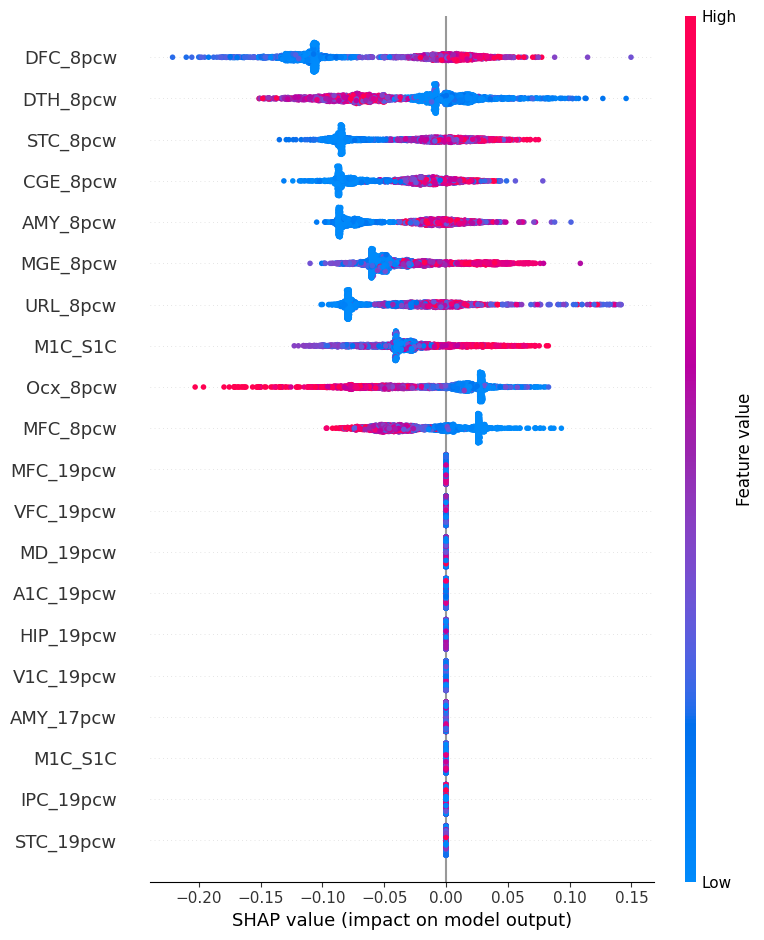

<Figure size 640x480 with 0 Axes>

In [ ]:
import shap
import matplotlib.pyplot as plt

print("Variable Importance Plot - Global Interpretation")
print("SHAP values shape:", shap_values.shape)
print("X shape:", X.shape)

# For binary classification, use the SHAP values for one class
shap_values_class1 = shap_values[:, :, 1]  # Assuming shape (num_samples, num_features, num_classes)

# Create the summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_class1, X)
plt.tight_layout()
plt.show()


In [ ]:
shap.initjs()

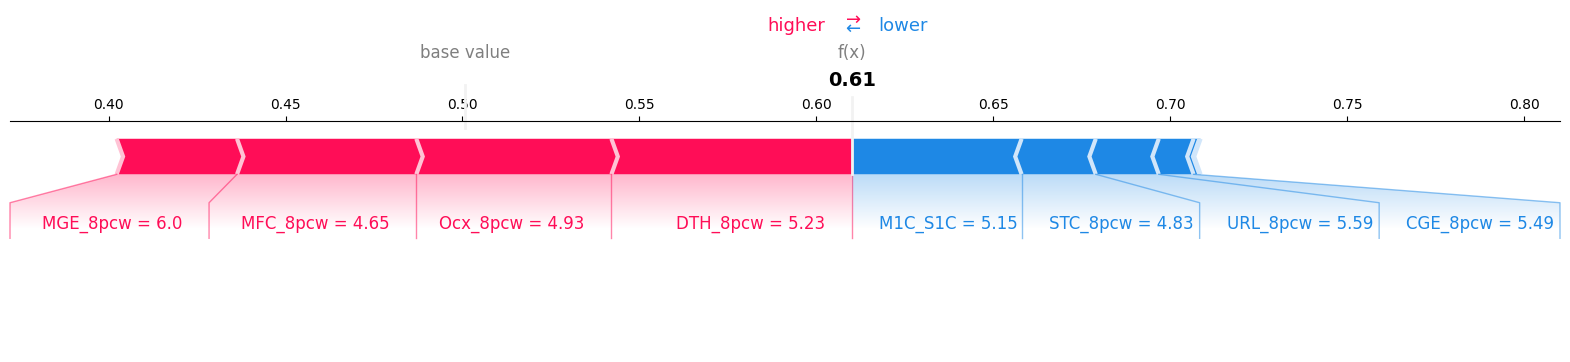

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0, :, 0], X.iloc[0], matplotlib=True)

In [ ]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

In [ ]:
# Save the DataFrame with the Sex feature to a CSV file
X_with_sex.to_csv('/content/X_with_sex.csv', index=False)


In [ ]:
# Load the saved CSV file
X_with_sex_loaded = pd.read_csv('/content/X_with_sex.csv')

# Display the first few rows to check the gender column
print(X_with_sex_loaded.head())


   Ocx_8pcw_M_13058  M1C_S1C_8pcw_M_13058  AMY_8pcw_M_13058  MGE_8pcw_M_13058  \
0              4.93                  5.15              5.43              6.00   
1              2.86                  2.87              3.93              3.23   
2              1.46                  0.95              1.19              1.46   
3              3.81                  3.32              2.95              3.49   
4              5.04                  5.49              5.31              5.32   

   STC_8pcw_M_13058  URL_8pcw_M_13058  CGE_8pcw_M_13058  DTH_8pcw_M_13058  \
0              4.83              5.59              5.49              5.23   
1              3.54              3.84              2.84              4.15   
2              1.25              0.78              1.16              0.73   
3              3.12              2.56              3.44              2.87   
4              5.47              5.20              5.40              5.03   

   MFC_8pcw_M_13058  DFC_8pcw_M_13058  ...  CBC_40

In [ ]:
# List all column names in the DataFrame
print(X_with_sex_loaded.columns)


Index(['Ocx_8pcw_M_13058', 'M1C_S1C_8pcw_M_13058', 'AMY_8pcw_M_13058',
       'MGE_8pcw_M_13058', 'STC_8pcw_M_13058', 'URL_8pcw_M_13058',
       'CGE_8pcw_M_13058', 'DTH_8pcw_M_13058', 'MFC_8pcw_M_13058',
       'DFC_8pcw_M_13058',
       ...
       'CBC_40yrs_F_12304', 'V1C_40yrs_F_12304', 'OFC_40yrs_F_12304',
       'STC_40yrs_F_12304', 'IPC_40yrs_F_12304', 'M1C_40yrs_F_12304',
       'HIP_40yrs_F_12304', 'STR_40yrs_F_12304', 'S1C_40yrs_F_12304', 'Sex'],
      dtype='object', length=525)


In [ ]:
import pandas as pd

# Load the feature dataset (with features but without target variable)
features_file_path = '/content/X_with_sex.csv'
features_df = pd.read_csv(features_file_path)

# Load the target variable dataset (assuming it has the same index or identifier as the feature dataset)
# target_file_path = '/content/Y_with_target.csv'  # Update this path to your actual target file
# target_df = pd.read_csv(target_file_path)

# # Ensure the target dataset contains the 'Gene Type' column
# print(target_df.head())

# Merge the datasets on a common identifier if needed (e.g., 'ID' or index)
# For this example, I'm assuming the index is the common key
# Make sure 'ID' or index is the same in both datasets or adapt the merge key accordingly
merged_df = pd.concat([features_df, Y], axis=1)

# Verify the merged dataset
print(merged_df.head())


   Ocx_8pcw_M_13058  M1C_S1C_8pcw_M_13058  AMY_8pcw_M_13058  MGE_8pcw_M_13058  \
0              4.93                  5.15              5.43              6.00   
1              2.86                  2.87              3.93              3.23   
2              1.46                  0.95              1.19              1.46   
3              3.81                  3.32              2.95              3.49   
4              5.04                  5.49              5.31              5.32   

   STC_8pcw_M_13058  URL_8pcw_M_13058  CGE_8pcw_M_13058  DTH_8pcw_M_13058  \
0              4.83              5.59              5.49              5.23   
1              3.54              3.84              2.84              4.15   
2              1.25              0.78              1.16              0.73   
3              3.12              2.56              3.44              2.87   
4              5.47              5.20              5.40              5.03   

   MFC_8pcw_M_13058  DFC_8pcw_M_13058  ...  V1C_40

In [ ]:
# Map 'Sex' values to categorical
merged_df['Sex'] = merged_df['Sex'].map({1: 'Male', 0: 'Female'})

# Calculate the counts of males and females for ASD and Non-ASD
gender_asd_counts = merged_df[merged_df['Gene Type'] == 'ASD'].groupby('Sex').size()
gender_non_asd_counts = merged_df[merged_df['Gene Type'] == 'Non-ASD'].groupby('Sex').size()

# Print out the counts
print("Counts of Males and Females associated with ASD:")
print(gender_asd_counts)
print("\nCounts of Males and Females associated with Non-ASD:")
print(gender_non_asd_counts)

# Calculate and display proportions
total_asd = gender_asd_counts.sum()
total_non_asd = gender_non_asd_counts.sum()

print("\nProportion of Males and Females associated with ASD:")
print(f"Male: {gender_asd_counts.get('Male', 0)} ({(gender_asd_counts.get('Male', 0) / total_asd) * 100:.2f}%)")
print(f"Female: {gender_asd_counts.get('Female', 0)} ({(gender_asd_counts.get('Female', 0) / total_asd) * 100:.2f}%)")

print("\nProportion of Males and Females associated with Non-ASD:")
print(f"Male: {gender_non_asd_counts.get('Male', 0)} ({(gender_non_asd_counts.get('Male', 0) / total_non_asd) * 100:.2f}%)")
print(f"Female: {gender_non_asd_counts.get('Female', 0)} ({(gender_non_asd_counts.get('Female', 0) / total_non_asd) * 100:.2f}%)")


Counts of Males and Females associated with ASD:
Series([], dtype: int64)

Counts of Males and Females associated with Non-ASD:
Series([], dtype: int64)

Proportion of Males and Females associated with ASD:
Male: 0 (nan%)
Female: 0 (nan%)

Proportion of Males and Females associated with Non-ASD:
Male: 0 (nan%)
Female: 0 (nan%)


<ipython-input-28-ed4b5507f0ae>:19: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Male: {gender_asd_counts.get('Male', 0)} ({(gender_asd_counts.get('Male', 0) / total_asd) * 100:.2f}%)")
<ipython-input-28-ed4b5507f0ae>:20: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Female: {gender_asd_counts.get('Female', 0)} ({(gender_asd_counts.get('Female', 0) / total_asd) * 100:.2f}%)")
<ipython-input-28-ed4b5507f0ae>:23: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Male: {gender_non_asd_counts.get('Male', 0)} ({(gender_non_asd_counts.get('Male', 0) / total_non_asd) * 100:.2f}%)")
<ipython-input-28-ed4b5507f0ae>:24: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Female: {gender_non_asd_counts.get('Female', 0)} ({(gender_non_asd_counts.get('Female', 0) / total_non_asd) * 100:.2f}%)")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, matthews_corrcoef, roc_auc_score, f1_score,
                             confusion_matrix, recall_score)
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from lime import lime_tabular

# Load the dataset
file_path = '/content/Supplementary_Tables.xlsx'
df = pd.read_excel(file_path, sheet_name='Supplementary Table S1')

# Separate the target variable and the feature set
genes = df['Gene']
X = df.drop(columns=['Gene', 'Ensembl ID', 'Gene Type'])  # Dropping only non-feature columns that aren't useful for prediction
Y = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)  # Assuming 'Gene Type' is the target

# Save feature names for later
feature_names = X.columns

# Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, genes_train, genes_test = train_test_split(X, Y, genes, test_size=0.2, random_state=42)

# Define sampling techniques
def apply_sampling(X_train, y_train, technique):
    if technique == 'RandomOverSampler':
        sampler = RandomOverSampler(random_state=42)
    elif technique == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif technique == 'ADASYN':
        sampler = ADASYN(random_state=42)
    else:
        raise ValueError("Unknown sampling technique")

    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled

# Define feature selection methods
def lasso_feature_selection(X_train, y_train, X_test, feature_names):
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), feature_names[selected_indices]

def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), feature_names[selected_indices]

# # Define PCA transformation
# def apply_pca(X_train, X_test):
#     pca = PCA(n_components=0.95)  # Keep 95% of the variance
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)
#     return X_train_pca, X_test_pca
# Define PCA transformation and fit on data
def fit_pca(X_train, X_test):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    # Find out how many components were selected
    num_components = pca.n_components_
    print(f"Number of components retained: {num_components}")

    # Plot the cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_train_pca, X_test_pca

# Fit PCA and plot explained variance
# X_train_pca, X_test_pca = fit_pca(X_train_resampled, X_test)
def evaluate_model(X_train, X_test, y_train, y_test, model_name, feature_names):
    if model_name == "Random Forest with Grid Search":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-ASD', 'ASD'], yticklabels=['Non-ASD', 'ASD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return model

# Function to train and evaluate a model, and visualize the confusion matrix
# def evaluate_model(X_train, X_test, y_train, y_test, model_name, feature_names):
#     model = LogisticRegression(random_state=42)
#     # model = RandomForestClassifier(random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_prob = model.predict_proba(X_test)[:, 1]

#     conf_matrix = confusion_matrix(y_test, y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     mcc = matthews_corrcoef(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_prob)
#     f1 = f1_score(y_test, y_pred)
#     sensitivity = recall_score(y_test, y_pred)
#     specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
#     g_mean = (sensitivity * specificity) ** 0.5

#     print(f"Model: {model_name}")
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"MCC: {mcc:.4f}")
#     print(f"AUC ROC: {roc_auc:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print(f"Sensitivity: {sensitivity:.4f}")
#     print(f"Specificity: {specificity:.4f}")
#     print(f"G Mean: {g_mean:.4f}")
#     print("-" * 40)

#     # Visualize the confusion matrix
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-ASD', 'ASD'], yticklabels=['Non-ASD', 'ASD'])
#     plt.title(f'Confusion Matrix - {model_name}')
#     plt.xlabel('Predicted Label')
#     plt.ylabel('True Label')
#     plt.show()

#     return model

# Sampling techniques to apply
sampling_techniques = ['RandomOverSampler', 'SMOTE', 'ADASYN']

for technique in sampling_techniques:
    print(f"Applying {technique}")

    # Apply sampling technique
    X_train_resampled, y_train_resampled = apply_sampling(X_train, y_train, technique)

    # Apply feature selection methods
    X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train_resampled, y_train_resampled, X_test, feature_names)
    X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train_resampled, y_train_resampled, X_test, feature_names)

    # Apply PCA
    # X_train_pca, X_test_pca = apply_pca(X_train_resampled, X_test)
    X_train_pca, X_test_pca = fit_pca(X_train_resampled, X_test)
    # Train and evaluate models with different feature selections
    models = {
        "Lasso Feature Selection": (X_train_lasso, X_test_lasso, lasso_feature_names),
        "Random Forest Feature Selection": (X_train_rf, X_test_rf, rf_feature_names),
        # "PCA": (X_train_pca, X_test_pca, [f"PCA Component {i+1}" for i in range(X_train_pca.shape[1])]),
        # "Random Forest with Grid Search": (X_train_rf, X_test_rf, rf_feature_names)
    }


    for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
        model = evaluate_model(X_train_fs, X_test_fs, y_train_resampled, y_test, name, fs_feature_names)

        # Create a LIME explainer
        explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

        # # Explain a prediction
        for i in range(3):  # Explain the first 3 instances
            exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)
            exp.show_in_notebook(show_all=False)
            # plot_lime_explanation(exp, f"LIME explanation for {genes_test.iloc[i]}", figsize=(20, 10))
            print(f"Gene being explained: {genes_test.iloc[i]}")

            # Show LIME prediction and compare with actual label
            lime_prediction = model.predict([X_test_fs[i]])[0]
            actual_label = y_test.iloc[i]
            print(f"LIME Prediction: {'ASD' if lime_prediction == 1 else 'Non-ASD'}, Actual Label: {'ASD' if actual_label == 1 else 'Non-ASD'}")
            print(f"Prediction Match: {lime_prediction == actual_label}")
            print("-" * 40)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, matthews_corrcoef, roc_auc_score, f1_score,
                             confusion_matrix, recall_score)
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from lime import lime_tabular

# Load the dataset
file_path = '/content/Supplementary_Tables.xlsx'
df = pd.read_excel(file_path, sheet_name='Supplementary Table S1')

# Separate the target variable and the feature set
genes = df['Gene']
X = df.drop(columns=['Gene', 'Ensembl ID', 'Gene Type'])  # Dropping only non-feature columns that aren't useful for prediction
Y = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)  # Assuming 'Gene Type' is the target

# Identify male and female feature columns based on the pattern
male_features = [col for col in X.columns if '_M_' in col]
female_features = [col for col in X.columns if '_F_' in col]

# Create separate DataFrames for male and female features
X_male = X[male_features]
X_female = X[female_features]

# Count how many males are diagnosed with ASD
male_asd_count = df[df['Gene Type'] == 'ASD'][male_features].sum().sum()
print(f"Number of males diagnosed with ASD: {male_asd_count}")

# Optional: Combine male and female features if needed
X_combined = pd.concat([X_male, X_female], axis=1)

# Save feature names for later
feature_names = X_combined.columns

# The rest of your code continues here...


# The rest of the code follows here...


# Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_combined)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, genes_train, genes_test = train_test_split(X_combined, Y, genes, test_size=0.2, random_state=42)

# Define sampling techniques
def apply_sampling(X_train, y_train, technique):
    if technique == 'RandomOverSampler':
        sampler = RandomOverSampler(random_state=42)
    elif technique == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif technique == 'ADASYN':
        sampler = ADASYN(random_state=42)
    else:
        raise ValueError("Unknown sampling technique")

    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled

# Define feature selection methods
def lasso_feature_selection(X_train, y_train, X_test, feature_names):
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), feature_names[selected_indices]

def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), feature_names[selected_indices]

# Define PCA transformation and fit on data
def fit_pca(X_train, X_test):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    # Find out how many components were selected
    num_components = pca.n_components_
    print(f"Number of components retained: {num_components}")

    # Plot the cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_train_pca, X_test_pca

# Function to evaluate model performance
def evaluate_model(X_train, X_test, y_train, y_test, model_name, feature_names):
    if model_name == "Random Forest with Grid Search":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-ASD', 'ASD'], yticklabels=['Non-ASD', 'ASD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return model

# Sampling techniques to apply
sampling_techniques = ['RandomOverSampler', 'SMOTE', 'ADASYN']

for technique in sampling_techniques:
    print(f"Applying {technique}")

    # Apply sampling technique
    X_train_resampled, y_train_resampled = apply_sampling(X_train, y_train, technique)

    # Apply feature selection methods
    X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train_resampled, y_train_resampled, X_test, feature_names)
    X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train_resampled, y_train_resampled, X_test, feature_names)

    # Apply PCA
    X_train_pca, X_test_pca = fit_pca(X_train_resampled, X_test)

    # Train and evaluate models with different feature selections
    models = {
        "Lasso Feature Selection": (X_train_lasso, X_test_lasso, lasso_feature_names),
        "Random Forest Feature Selection": (X_train_rf, X_test_rf, rf_feature_names),
    }

    for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
        model = evaluate_model(X_train_fs, X_test_fs, y_train_resampled, y_test, name, fs_feature_names)

        # Create a LIME explainer
        explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

        # Explain a prediction
        for i in range(3):  # Explain the first 3 instances
            exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)
            exp.show_in_notebook(show_all=False)
            print(f"Gene being explained: {genes_test.iloc[i]}")

            # Show LIME prediction and compare with actual label
            lime_prediction = model.predict([X_test_fs[i]])[0]
            actual_label = y_test.iloc[i]
            print(f"LIME Prediction: {'ASD' if lime_prediction == 1 else 'Non-ASD'}, Actual Label: {'ASD' if actual_label == 1 else 'Non-ASD'}")
            print(f"Prediction Match: {lime_prediction == actual_label}")
            print("-" * 40)


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Supplementary_Tables.xlsx'
df = pd.read_excel(file_path, sheet_name='Supplementary Table S1')

# Define the function to extract gender from feature names
def extract_gender(feature_name):
    if isinstance(feature_name, str):
        if 'M' in feature_name:
            return 1
        elif 'F' in feature_name:
            return 0
    return None

# Separate features (X) and target variable (Y)
X = df.drop(columns=['Gene', 'Ensembl ID', 'Gene Type'])
Y = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)

# Create gender columns based on feature names in X
gender_columns = [col for col in X.columns if '_F_' in col or '_M_' in col]

# Create a dictionary to hold new gender columns
gender_data = {}
for col in gender_columns:
    gender_data[col + '_Gender'] = X[col].apply(lambda x: extract_gender(x) if pd.notnull(x) else None)

# Create a new DataFrame from the dictionary
gender_df = pd.DataFrame(gender_data)

# Concatenate the new DataFrame with the existing one
df = pd.concat([df, gender_df], axis=1)

# Encode target variable 'Gene Type'
df['Gene Type'] = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)

# Save the updated DataFrame
df.to_csv('/content/Updated_Dataset.csv', index=False)

# Analyze if males are more associated with ASD for all gender columns
gender_columns = [col for col in df.columns if '_Gender' in col]

for gender_column in gender_columns:
    if gender_column in df.columns:
        print(f"\nAnalyzing column: {gender_column}")

        # Calculate average ASD association by gender
        gender_asd_correlation = df.groupby(gender_column)['Gene Type'].mean()
        print("Average ASD association by gender:")
        print(gender_asd_correlation)

        # Calculate proportion of ASD among males and females
        male_asd_proportion = df[df[gender_column] == 1]['Gene Type'].mean()
        female_asd_proportion = df[df[gender_column] == 0]['Gene Type'].mean()
        print(f"Proportion of ASD among males: {male_asd_proportion:.2f}")
        print(f"Proportion of ASD among females: {female_asd_proportion:.2f}")
    else:
        print(f"Gender column '{gender_column}' not found in DataFrame.")



Analyzing column: Ocx_8pcw_M_13058_Gender
Average ASD association by gender:
Series([], Name: Gene Type, dtype: float64)
Proportion of ASD among males: nan
Proportion of ASD among females: nan

Analyzing column: M1C_S1C_8pcw_M_13058_Gender
Average ASD association by gender:
Series([], Name: Gene Type, dtype: float64)
Proportion of ASD among males: nan
Proportion of ASD among females: nan

Analyzing column: AMY_8pcw_M_13058_Gender
Average ASD association by gender:
Series([], Name: Gene Type, dtype: float64)
Proportion of ASD among males: nan
Proportion of ASD among females: nan

Analyzing column: MGE_8pcw_M_13058_Gender
Average ASD association by gender:
Series([], Name: Gene Type, dtype: float64)
Proportion of ASD among males: nan
Proportion of ASD among females: nan

Analyzing column: STC_8pcw_M_13058_Gender
Average ASD association by gender:
Series([], Name: Gene Type, dtype: float64)
Proportion of ASD among males: nan
Proportion of ASD among females: nan

Analyzing column: URL_8pc

In [ ]:
def extract_gender(feature_name):
    if 'F_' in feature_name:
        return 'Female'
    elif 'M_' in feature_name:
        return 'Male'
    else:
        return 'Unknown'  # Handle cases where gender might not be identified

# Apply the function to create a Gender column in a DataFrame
gender_df = pd.DataFrame({
    'feature_names': X.columns,
    'Gender': [extract_gender(name) for name in X.columns]
})

print(gender_df.head(10))


          feature_names Gender
0      Ocx_8pcw_M_13058   Male
1  M1C_S1C_8pcw_M_13058   Male
2      AMY_8pcw_M_13058   Male
3      MGE_8pcw_M_13058   Male
4      STC_8pcw_M_13058   Male
5      URL_8pcw_M_13058   Male
6      CGE_8pcw_M_13058   Male
7      DTH_8pcw_M_13058   Male
8      MFC_8pcw_M_13058   Male
9      DFC_8pcw_M_13058   Male


In [ ]:
# Check for duplicate feature names
duplicates = df_features.columns[df_features.columns.duplicated()]

if not duplicates.empty:
    print("Duplicate feature names found:")
    print(duplicates)


Duplicate feature names found:
Index(['Gender', 'Gender'], dtype='object')


In [ ]:
# Create a DataFrame with unique feature names and corresponding genders
gender_df_unique = gender_df.drop_duplicates(subset='Feature Name')

# Create a dictionary mapping feature names to gender
gender_mapping = dict(zip(gender_df_unique['Feature Name'], gender_df_unique['Gender']))


In [ ]:
# Ensure gender_mapping only contains features present in df_features
gender_mapping = {feature: gender for feature, gender in zip(gender_df_unique['Feature Name'], gender_df_unique['Gender']) if feature in df_features.columns}


In [ ]:
# Check for columns in df_features that are in the gender_mapping
common_features = [feature for feature in df_features.columns if feature in gender_mapping]

# Check for the length of common features and df_features
print(f"Length of df_features columns: {len(df_features.columns)}")
print(f"Length of common features: {len(common_features)}")

# Create a DataFrame with only the common features
df_features_common = df_features[common_features]

# Add the Gender column based on the mapping
df['Gender'] = df_features_common.columns.to_series().map(gender_mapping)


Length of df_features columns: 525
Length of common features: 524


In [ ]:
# Identify feature names in df_features that do not have a corresponding gender mapping
missing_mappings = [feature for feature in df_features.columns if feature not in gender_mapping]
print("Features with missing gender mappings:")
print(missing_mappings)


Features with missing gender mappings:
['Gender']


In [ ]:
# Verify the Gender column
print(df[['Gene', 'Gender']].head())


    Gene Gender Gender Gender
0   ABAT    NaN    NaN    NaN
1  ACSL4    NaN    NaN    NaN
2    ADA    NaN    NaN    NaN
3    ADK    NaN    NaN    NaN
4   ADNP    NaN    NaN    NaN


In [ ]:
# Check if the Gender column was added correctly
print(df[['Gene', 'Gender']].head())


    Gene Gender Gender Gender
0   ABAT    NaN    NaN    NaN
1  ACSL4    NaN    NaN    NaN
2    ADA    NaN    NaN    NaN
3    ADK    NaN    NaN    NaN
4   ADNP    NaN    NaN    NaN


In [ ]:
# First, ensure that the 'Feature' column in gender_df matches the corresponding column in df

# Extract gender from the feature names in df
df['Gender'] = gender_df['feature_names'].apply(lambda x: extract_gender(x))

# Check if 'Gender' has been added correctly
print(df[['Gene', 'Gender', 'Gene Type']].head(10))


      Gene Gender Gender Gender Gene Type
0     ABAT   Male   Male   Male       ASD
1    ACSL4   Male   Male   Male       ASD
2      ADA   Male   Male   Male       ASD
3      ADK   Male   Male   Male       ASD
4     ADNP   Male   Male   Male       ASD
5  ADORA2A   Male   Male   Male       ASD
6    ADRB2   Male   Male   Male       ASD
7     ADSL   Male   Male   Male       ASD
8     AFF2   Male   Male   Male       ASD
9    AGAP1   Male   Male   Male       ASD


In [ ]:
# Group by 'Gender' and 'Gene Type' to see the distribution
gender_distribution = df.groupby(['Gender', 'Gene Type']).size().unstack(fill_value=0)

print(gender_distribution)

# Plot the distribution
gender_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender by Gene Type')
plt.legend(title='Gene Type')
plt.show()


ValueError: Grouper for 'Gender' not 1-dimensional

In [ ]:
# Create a DataFrame with gender and ASD status
gender_asd_df = df[['Gender', 'Gene Type']].copy()
gender_asd_df['Gene Type'] = gender_asd_df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)

# Group by gender and calculate the mean ASD rate
gender_asd_summary = gender_asd_df.groupby('Gender').mean()
print(gender_asd_summary)


Empty DataFrame
Columns: [Gene Type]
Index: []


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Gene Type'])
print(contingency_table)

# Perform chi-square test
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("There is a significant association between gender and ASD.")
else:
    print("There is no significant association between gender and ASD.")


Empty DataFrame
Columns: []
Index: []


ValueError: No data; `observed` has size 0.

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/X_with_sex.csv'
df = pd.read_csv(file_path)

# Assuming 'Gene Type' column exists in the dataset
# Display the first few rows to verify
print(df.head())

# Calculate the counts of males and females for ASD and Non-ASD
# First, make sure 'Sex' is properly mapped as 1 for male and 0 for female
df['Sex'] = df['Sex'].map({1: 'Male', 0: 'Female'})

# Group by 'Gene Type' and 'Sex' and count occurrences
gender_asd_counts = df[df['Gene Type'] == 'ASD'].groupby('Sex').size()
gender_non_asd_counts = df[df['Gene Type'] == 'Non-ASD'].groupby('Sex').size()

# Print out the counts
print("Counts of Males and Females associated with ASD:")
print(gender_asd_counts)
print("\nCounts of Males and Females associated with Non-ASD:")
print(gender_non_asd_counts)

# Calculate and display proportions
total_asd = gender_asd_counts.sum()
total_non_asd = gender_non_asd_counts.sum()

print("\nProportion of Males and Females associated with ASD:")
print(f"Male: {gender_asd_counts.get('Male', 0)} ({(gender_asd_counts.get('Male', 0) / total_asd) * 100:.2f}%)")
print(f"Female: {gender_asd_counts.get('Female', 0)} ({(gender_asd_counts.get('Female', 0) / total_asd) * 100:.2f}%)")

print("\nProportion of Males and Females associated with Non-ASD:")
print(f"Male: {gender_non_asd_counts.get('Male', 0)} ({(gender_non_asd_counts.get('Male', 0) / total_non_asd) * 100:.2f}%)")
print(f"Female: {gender_non_asd_counts.get('Female', 0)} ({(gender_non_asd_counts.get('Female', 0) / total_non_asd) * 100:.2f}%)")


   Ocx_8pcw_M_13058  M1C_S1C_8pcw_M_13058  AMY_8pcw_M_13058  MGE_8pcw_M_13058  \
0              4.93                  5.15              5.43              6.00   
1              2.86                  2.87              3.93              3.23   
2              1.46                  0.95              1.19              1.46   
3              3.81                  3.32              2.95              3.49   
4              5.04                  5.49              5.31              5.32   

   STC_8pcw_M_13058  URL_8pcw_M_13058  CGE_8pcw_M_13058  DTH_8pcw_M_13058  \
0              4.83              5.59              5.49              5.23   
1              3.54              3.84              2.84              4.15   
2              1.25              0.78              1.16              0.73   
3              3.12              2.56              3.44              2.87   
4              5.47              5.20              5.40              5.03   

   MFC_8pcw_M_13058  DFC_8pcw_M_13058  ...  CBC_40

KeyError: 'Gene Type'

In [ ]:
# Assuming the columns are named 'Gene Type' and 'Sex'
# Ensure these columns exist
if 'Gene Type' in X_with_sex_loaded.columns and 'Sex' in X_with_sex_loaded.columns:
    # Filter the DataFrame for ASD cases (assuming 'Gene Type' = 1 for ASD)
    df_asd = X_with_sex_loaded[X_with_sex_loaded['Gene Type'] == 1]

    # Count the number of ASD cases by gender
    asd_counts_by_gender = df_asd['Sex'].value_counts()

    # Count the total number of cases by gender
    total_counts_by_gender = X_with_sex_loaded['Sex'].value_counts()

    # Compute the percentage of ASD cases by gender
    asd_percentage_by_gender = (asd_counts_by_gender / total_counts_by_gender) * 100

    # Print results
    print("Number of ASD cases by gender:")
    print(asd_counts_by_gender)

    print("\nTotal number of cases by gender:")
    print(total_counts_by_gender)

    print("\nPercentage of ASD cases by gender:")
    print(asd_percentage_by_gender)

    # Compare percentages
    male_asd_percentage = asd_percentage_by_gender.get(1, 0)
    female_asd_percentage = asd_percentage_by_gender.get(0, 0)

    print("\nComparison of ASD cases between males and females:")
    print(f"Percentage of ASD cases in males: {male_asd_percentage:.2f}%")
    print(f"Percentage of ASD cases in females: {female_asd_percentage:.2f}%")
else:
    print("The required columns are missing from the dataset.")


The required columns are missing from the dataset.


In [ ]:
# Save the updated dataset with the new 'Sex' feature
output_file_path = '/content/Updated_Supplementary_Tables.csv'
X_with_target = pd.concat([X, df[['Gene', 'Gene Type']]], axis=1)  # Combine features with target and gene columns
X_with_target.to_csv(output_file_path, index=False)

print(f"Updated dataset saved to {output_file_path}")


In [ ]:
# Define function to plot LIME explanations for both classes
def plot_lime_explanation(exp, class_name):
    exp.as_pyplot_figure(label=class_name)
    plt.title(f"Local explanation for class {class_name}")
    plt.show()

# Loop over the first few test instances
for i in range(3):  # You can adjust the range based on how many instances you want to explain
    exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)

    # Plot explanation for 'Non-ASD' class (class 0)
    plot_lime_explanation(exp, class_name=0)

    # Plot explanation for 'ASD' class (class 1)
    plot_lime_explanation(exp, class_name=1)

    print(f"Gene being explained: {genes_test.iloc[i]}")
    lime_prediction = model.predict([X_test_fs[i]])[0]
    actual_label = y_test.iloc[i]
    print(f"LIME Prediction: {'ASD' if lime_prediction == 1 else 'Non-ASD'}, Actual Label: {'ASD' if actual_label == 1 else 'Non-ASD'}")
    print(f"Prediction Match: {lime_prediction == actual_label}")
    print("-" * 40)


KeyError: 0

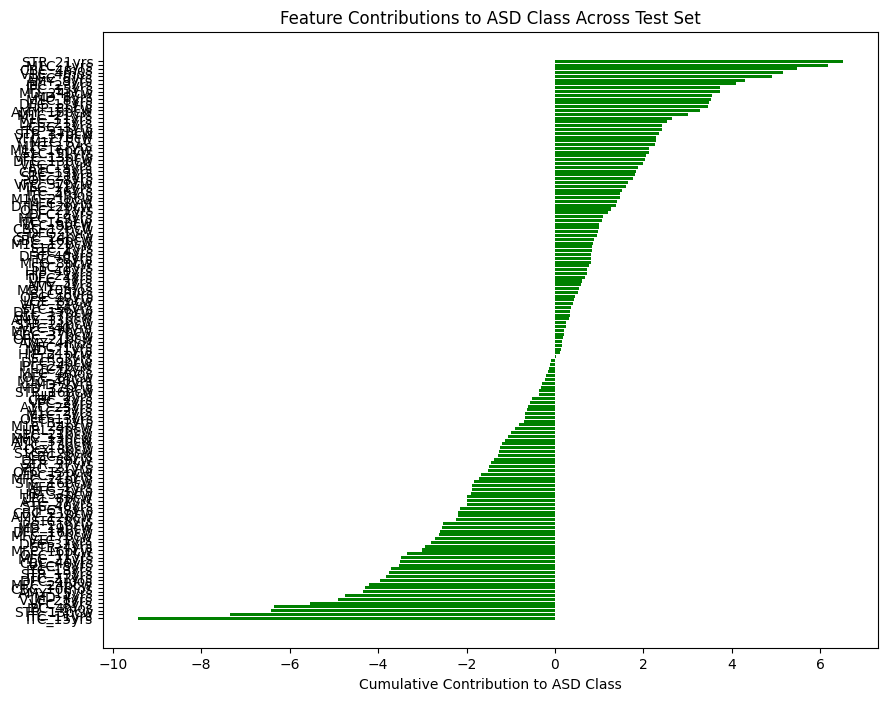

In [ ]:
# Dictionary to store cumulative feature contributions for the ASD class (class 1)
feature_contributions = {feature: 0 for feature in fs_feature_names}

# Loop over test instances
for i in range(len(X_test_fs)):  # Loop over the entire test set
    exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=len(fs_feature_names))

    # Check if the explanation for the ASD class (class index 1) exists
    if 1 in exp.local_exp:
        local_exp = exp.local_exp[1]  # Get the local explanation for the ASD class

        # Sum up the contributions of each feature
        for feature_idx, contribution in local_exp:
            feature_name = fs_feature_names[feature_idx]
            feature_contributions[feature_name] += contribution

# Sort features by their total contribution to the ASD class
sorted_contributions = sorted(feature_contributions.items(), key=lambda x: x[1], reverse=True)

# Plot the contributions
feature_names, contributions = zip(*sorted_contributions)
plt.figure(figsize=(10, 8))
plt.barh(feature_names, contributions, color='green')
plt.xlabel('Cumulative Contribution to ASD Class')
plt.title('Feature Contributions to ASD Class Across Test Set')
plt.gca().invert_yaxis()  # Reverse the order to have the largest at the top
plt.show()


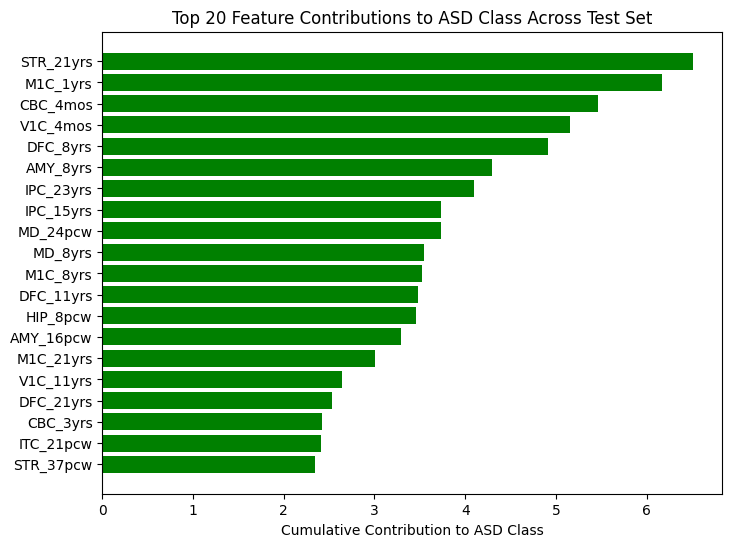

In [ ]:
# Sort features by their total contribution to the ASD class
sorted_contributions = sorted(feature_contributions.items(), key=lambda x: x[1], reverse=True)

# Optionally, select top N features for display (e.g., top 20)
top_n = 20
sorted_contributions = sorted_contributions[:top_n]

# Plot the contributions
feature_names, contributions = zip(*sorted_contributions)
plt.figure(figsize=(8, 6))  # Increase the figure size
plt.barh(feature_names, contributions, color='green')
plt.xlabel('Cumulative Contribution to ASD Class')
plt.title(f'Top {top_n} Feature Contributions to ASD Class Across Test Set')
plt.gca().invert_yaxis()  # Reverse the order to have the largest at the top

# Rotate the labels to prevent overlap
plt.yticks(rotation=0, ha="right")

plt.show()


In [ ]:
# Assuming you have a dictionary feature_contributions where keys are feature names
# and values are contributions to ASD class

# Map feature names to genes
feature_gene_map = {feature: gene for feature, gene in zip(X.columns, genes_train)}

# Aggregate contributions by gene
gene_contributions = {}
for feature, contribution in feature_contributions.items():
    gene = feature_gene_map.get(feature, None)
    if gene:
        if gene not in gene_contributions:
            gene_contributions[gene] = 0
        gene_contributions[gene] += contribution

# Sort genes by their total contribution
sorted_gene_contributions = sorted(gene_contributions.items(), key=lambda x: x[1], reverse=True)

# Optionally, select top N genes for display (e.g., top 20)
top_n = 20
sorted_gene_contributions = sorted_gene_contributions[:top_n]


In [ ]:
import matplotlib.pyplot as plt

# Extract gene names and their contributions
gene_names, contributions = zip(*sorted_gene_contributions)

# Plot the contributions
plt.figure(figsize=(10, 8))  # Increase the figure size for better readability
plt.barh(gene_names, contributions, color='blue')
plt.xlabel('Cumulative Contribution to ASD Class')
plt.title(f'Top {top_n} Genes Contributing to ASD Class')
plt.gca().invert_yaxis()  # Reverse the order to have the largest at the top
plt.show()


ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, matthews_corrcoef, roc_auc_score, f1_score,
                             confusion_matrix, recall_score)
from sklearn.feature_selection import SelectFromModel
from lime import lime_tabular

# Load the dataset
file_path = '/content/Supplementary_Tables.xlsx'
df = pd.read_excel(file_path, sheet_name='Supplementary Table S1')

# Separate the target variable and the feature set
genes = df['Gene']
X = df.drop(columns=['Gene', 'Ensembl ID', 'Gene Type'])  # Dropping only non-feature columns that aren't useful for prediction
Y = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)  # Assuming 'Gene Type' is the target

# Save feature names for later
feature_names = X.columns

# Function to trim feature names
def trim_feature_name(name):
    parts = name.split('_')
    if len(parts) > 2:
        return f"{parts[0]}_{parts[1]}"
    else:
        return name  # Return as is if the format is unexpected

# Apply the function to all feature names
trimmed_feature_names = [trim_feature_name(name) for name in feature_names]

# Update the feature names in the dataset
X.columns = trimmed_feature_names

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, genes_train, genes_test = train_test_split(X_scaled, Y, genes, test_size=0.2, random_state=42)

# Define function to get feature importance
def get_feature_importance(X_train, y_train, model_name):
    if model_name == 'Lasso':
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    elif model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42)
    else:
        raise ValueError("Unknown model name")

    model.fit(X_train, y_train)
    if model_name == 'Lasso':
        importance = np.abs(model.coef_[0])
    else:
        importance = model.feature_importances_

    return importance

# Get feature importance from Lasso and Random Forest
lasso_importance = get_feature_importance(X_train, y_train, 'Lasso')
rf_importance = get_feature_importance(X_train, y_train, 'RandomForest')

# Combine the importance scores into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': trimmed_feature_names,
    'Lasso Importance': lasso_importance,
    'Random Forest Importance': rf_importance
})

# Sort by Random Forest importance for display purposes
feature_importance_df.sort_values(by='Random Forest Importance', ascending=False, inplace=True)

# Display top 10 features
print(feature_importance_df.head(10))

# Define feature selection methods
def lasso_feature_selection(X_train, y_train, X_test, feature_names):
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Define PCA transformation and fit on data
def fit_pca(X_train, X_test):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Find out how many components were selected
    num_components = pca.n_components_
    print(f"Number of components retained: {num_components}")

    # Plot the cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_train_pca, X_test_pca

# Evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, model_name, feature_names):
    if model_name == "Random Forest with Grid Search":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-ASD', 'ASD'], yticklabels=['Non-ASD', 'ASD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return model

# Apply feature selection methods and model evaluation
X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train, y_train, X_test, trimmed_feature_names)
X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train, y_train, X_test, trimmed_feature_names)
X_train_pca, X_test_pca = fit_pca(X_train, X_test)
pca_feature_names = [f"PCA Component {i+1}" for i in range(X_train_pca.shape[1])]

# Define models with trimmed feature names
models = {
    "Lasso Feature Selection": (X_train_lasso, X_test_lasso, lasso_feature_names),
    "Random Forest Feature Selection": (X_train_rf, X_test_rf, rf_feature_names),
    "PCA": (X_train_pca, X_test_pca, pca_feature_names),
    "Random Forest with Grid Search": (X_train_rf, X_test_rf, rf_feature_names)
}

for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
    model = evaluate_model(X_train_fs, X_test_fs, y_train, y_test, name, fs_feature_names)

    # Create a LIME explainer with trimmed feature names
    explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

    # Explain predictions for some examples in the test set
    for i in range(5):  # Explain the first 5 predictions
        lime_exp = explainer.explain_instance(X_test_fs[i], model.predict_proba)
        lime_exp.show_in_notebook(show_table=True)
        print(f"Sample {i+1}:")
        lime_exp.save_to_file(f'/content/lime_explanation_{name}_sample_{i+1}.html')

# Store the results in a CSV file
result_data = pd.DataFrame({
    'Gene': genes_test,
    'Actual': y_test,
    'Predicted': model.predict(X_test_fs)
})

# Save the results to a CSV file
result_data.to_csv('/content/gene_predictions.csv', index=False)
print(f"Results saved to /content/gene_predictions.csv")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, matthews_corrcoef, roc_auc_score, f1_score,
                             confusion_matrix, recall_score)
from sklearn.feature_selection import SelectFromModel
from lime import lime_tabular

# Load the dataset
file_path = '/content/Supplementary_Tables.xlsx'
df = pd.read_excel(file_path, sheet_name='Supplementary Table S1')

# Separate the target variable and the feature set
genes = df['Gene']
X = df.drop(columns=['Gene', 'Ensembl ID', 'Gene Type'])  # Dropping only non-feature columns that aren't useful for prediction
Y = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)  # Assuming 'Gene Type' is the target

# Save feature names for later
feature_names = X.columns

# Function to trim feature names
def trim_feature_name(name):
    parts = name.split('_')
    if len(parts) > 2:
        return f"{parts[0]}_{parts[1]}"
    else:
        return name  # Return as is if the format is unexpected

# Apply the function to all feature names
trimmed_feature_names = [trim_feature_name(name) for name in feature_names]

# Update the feature names in the dataset
X.columns = trimmed_feature_names

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, genes_train, genes_test = train_test_split(X_scaled, Y, genes, test_size=0.2, random_state=42)

# Define function to get feature importance
def get_feature_importance(X_train, y_train, model_name):
    if model_name == 'Lasso':
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    elif model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42)
    else:
        raise ValueError("Unknown model name")

    model.fit(X_train, y_train)
    if model_name == 'Lasso':
        importance = np.abs(model.coef_[0])
    else:
        importance = model.feature_importances_

    return importance

# Get feature importance from Lasso and Random Forest
lasso_importance = get_feature_importance(X_train, y_train, 'Lasso')
rf_importance = get_feature_importance(X_train, y_train, 'RandomForest')

# Combine the importance scores into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': trimmed_feature_names,
    'Lasso Importance': lasso_importance,
    'Random Forest Importance': rf_importance
})

# Sort by Random Forest importance for display purposes
feature_importance_df.sort_values(by='Random Forest Importance', ascending=False, inplace=True)

# Display top 10 features
print(feature_importance_df.head(10))

# Define feature selection methods
def lasso_feature_selection(X_train, y_train, X_test, feature_names):
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Define PCA transformation and fit on data
def fit_pca(X_train, X_test):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Find out how many components were selected
    num_components = pca.n_components_
    print(f"Number of components retained: {num_components}")

    # Plot the cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_train_pca, X_test_pca

# Evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, model_name, feature_names):
    if model_name == "Random Forest with Grid Search":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-ASD', 'ASD'], yticklabels=['Non-ASD', 'ASD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return model

# Apply feature selection methods and model evaluation
X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train, y_train, X_test, trimmed_feature_names)
X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train, y_train, X_test, trimmed_feature_names)
X_train_pca, X_test_pca = fit_pca(X_train, X_test)
pca_feature_names = [f"PCA Component {i+1}" for i in range(X_train_pca.shape[1])]

# Define models with trimmed feature names
models = {
    "Lasso Feature Selection": (X_train_lasso, X_test_lasso, lasso_feature_names),
    "Random Forest Feature Selection": (X_train_rf, X_test_rf, rf_feature_names),
    "PCA": (X_train_pca, X_test_pca, pca_feature_names),
    "Random Forest with Grid Search": (X_train_rf, X_test_rf, rf_feature_names)
}

for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
    model = evaluate_model(X_train_fs, X_test_fs, y_train, y_test, name, fs_feature_names)

    # Create a LIME explainer with trimmed feature names
    explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

    # Explain a prediction
    for i in range(7):  # Explain the first 7 instances
        exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=10)
        exp.show_in_notebook(show_all=False)
        print(f"Gene being explained: {genes_test.iloc[i]}")

        # Show LIME prediction and compare with actual label
        lime_prediction = model.predict([X_test_fs[i]])[0]
        actual_label = y_test.iloc[i]
        print(f"LIME Predicted: {'ASD' if lime_prediction == 1 else 'Non-ASD'}, Actual: {'ASD' if actual_label == 1 else 'Non-ASD'}")

# Final results with full explanations and outputs are expected to be stored in a CSV file
result_data = pd.DataFrame({
    'Gene': genes_test,
    'Actual': y_test,
    'Predicted': model.predict(X_test)
})

# Save the results to a CSV file
result_data.to_csv('/content/gene_predictions.csv', index=False)
print(f"Results saved to /content/gene_predictions.csv")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, matthews_corrcoef, roc_auc_score, f1_score,
                             confusion_matrix, recall_score)
from sklearn.feature_selection import SelectFromModel
from lime import lime_tabular

# Load the dataset
file_path = '/mnt/data/Supplementary_Tables.xlsx'
df = pd.read_excel(file_path, sheet_name='Supplementary Table S1')

# Separate the target variable and the feature set
genes = df['Gene']
X = df.drop(columns=['Gene', 'Ensembl ID', 'Gene Type'])  # Dropping only non-feature columns that aren't useful for prediction
Y = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)  # Assuming 'Gene Type' is the target

# Save feature names for later
feature_names = X.columns

# Function to trim feature names
def trim_feature_name(name):
    parts = name.split('_')
    if len(parts) > 2:
        return f"{parts[0]}_{parts[1]}"
    else:
        return name  # Return as is if the format is unexpected

# Apply the function to all feature names
trimmed_feature_names = [trim_feature_name(name) for name in feature_names]

# Update the feature names in the dataset
X.columns = trimmed_feature_names

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, genes_train, genes_test = train_test_split(X_scaled, Y, genes, test_size=0.2, random_state=42)

# Define function to get feature importance
def get_feature_importance(X_train, y_train, model_name):
    if model_name == 'Lasso':
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    elif model_name == 'RandomForest':
        model = RandomForestClassifier(random_state=42)
    else:
        raise ValueError("Unknown model name")

    model.fit(X_train, y_train)
    if model_name == 'Lasso':
        importance = np.abs(model.coef_[0])
    else:
        importance = model.feature_importances_

    return importance

# Get feature importance from Lasso and Random Forest
lasso_importance = get_feature_importance(X_train, y_train, 'Lasso')
rf_importance = get_feature_importance(X_train, y_train, 'RandomForest')

# Combine the importance scores into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': trimmed_feature_names,
    'Lasso Importance': lasso_importance,
    'Random Forest Importance': rf_importance
})

# Sort by Random Forest importance for display purposes
feature_importance_df.sort_values(by='Random Forest Importance', ascending=False, inplace=True)

# Display top 10 features
print(feature_importance_df.head(10))

# Define feature selection methods
def lasso_feature_selection(X_train, y_train, X_test, feature_names):
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Define PCA transformation and fit on data
def fit_pca(X_train, X_test):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Find out how many components were selected
    num_components = pca.n_components_
    print(f"Number of components retained: {num_components}")

    # Plot the cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_train_pca, X_test_pca

# Evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, model_name, feature_names):
    if model_name == "Random Forest with Grid Search":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-ASD', 'ASD'], yticklabels=['Non-ASD', 'ASD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return model

# Apply feature selection methods and model evaluation
X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train, y_train, X_test, trimmed_feature_names)
X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train, y_train, X_test, trimmed_feature_names)
X_train_pca, X_test_pca = fit_pca(X_train, X_test)
pca_feature_names = [f"PCA Component {i+1}" for i in range(X_train_pca.shape[1])]

# Define models with trimmed feature names
models = {
    "Lasso Feature Selection": (X_train_lasso, X_test_lasso, lasso_feature_names),
    "Random Forest Feature Selection": (X_train_rf, X_test_rf, rf_feature_names),
    "PCA": (X_train_pca, X_test_pca, pca_feature_names),
    "Random Forest with Grid Search": (X_train_rf, X_test_rf, rf_feature_names)
}

for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
    model = evaluate_model(X_train_fs, X_test_fs, y_train, y_test, name, fs_feature_names)

    # Create a LIME explainer with trimmed feature names
    explainer = lime_tabular.LimeTabularExplainer(X_train_fs, feature_names=fs_feature_names, class_names=['Non-ASD', 'ASD'], discretize_continuous=True)

    # Explain predictions for some examples in the test set
    for i in range(5):  # Explain the first 5 predictions
        lime_exp = explainer.explain_instance(X_test_fs[i], model.predict_proba)
        lime_exp.show_in_notebook(show_table=True)
        print(f"Sample {i+1}:")
        lime_exp.save_to_file(f'/mnt/data/lime_explanation_{name}_sample_{i+1}.html')

# Store the results in a CSV file
result_data = pd.DataFrame({
    'Gene': genes_test,
    'Actual': y_test,
    'Predicted': model.predict(X_test_fs)
})

# Save the results to a CSV file
result_data.to_csv('/mnt/data/gene_predictions.csv', index=False)
print(f"Results saved to /mnt/data/gene_predictions.csv")


Applying RandomOverSampler


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of components retained: 7


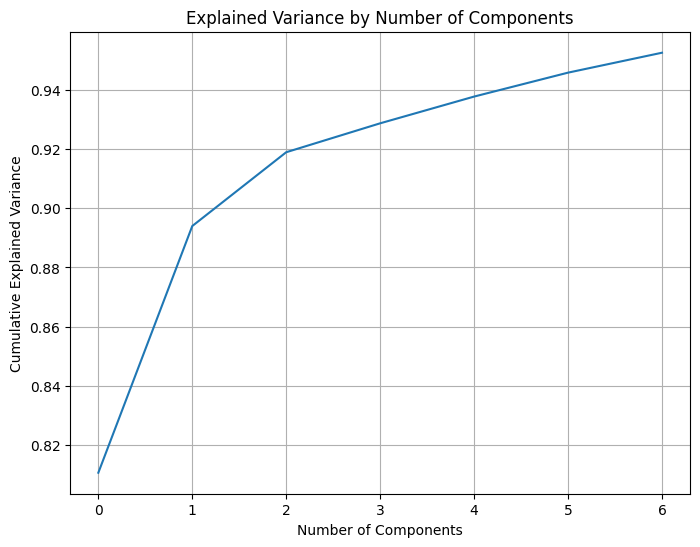

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Lasso Feature Selection
Accuracy: 0.7559
MCC: 0.3405
AUC ROC: 0.7756
F1 Score: 0.4639
Sensitivity: 0.6338
Specificity: 0.6338
G Mean: 0.6338
----------------------------------------


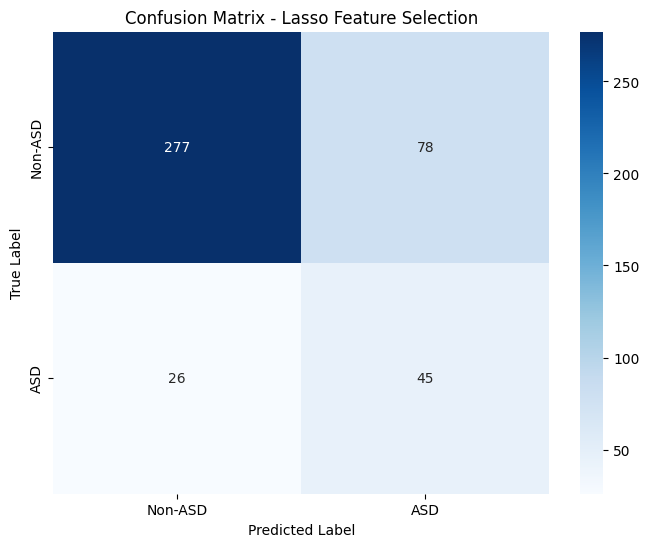

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random Forest Feature Selection
Accuracy: 0.7840
MCC: 0.4671
AUC ROC: 0.8583
F1 Score: 0.5534
Sensitivity: 0.8028
Specificity: 0.8028
G Mean: 0.8028
----------------------------------------


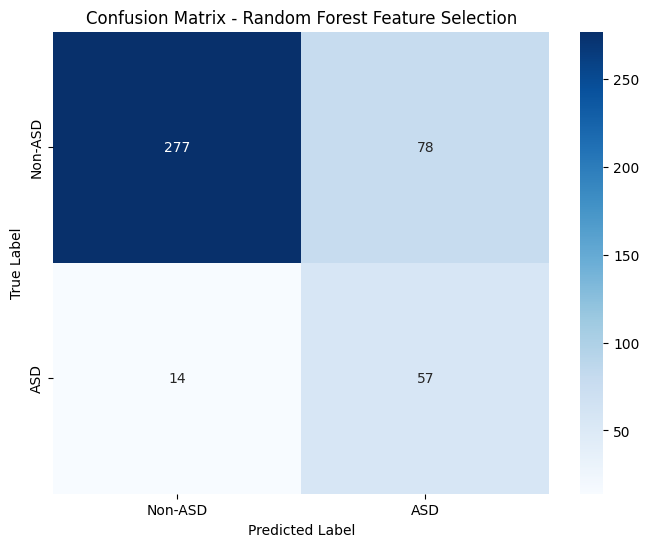

Model: PCA
Accuracy: 0.7418
MCC: 0.4438
AUC ROC: 0.8325
F1 Score: 0.5259
Sensitivity: 0.8592
Specificity: 0.8592
G Mean: 0.8592
----------------------------------------


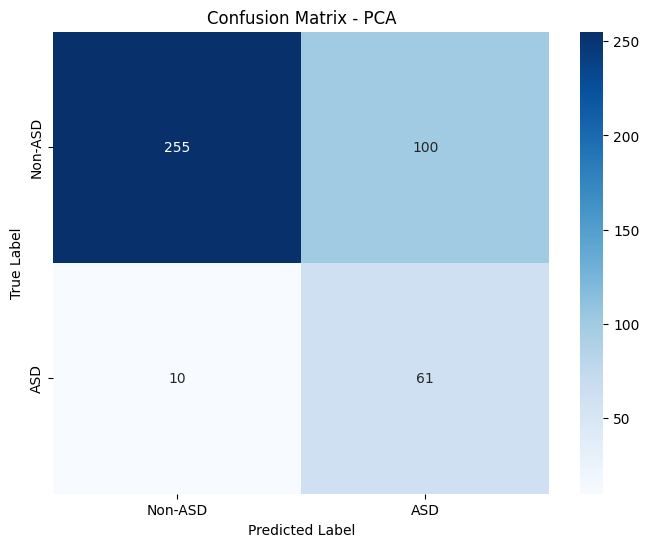

Model: Random Forest with Grid Search
Accuracy: 0.8498
MCC: 0.4039
AUC ROC: 0.8493
F1 Score: 0.4839
Sensitivity: 0.4225
Specificity: 0.4225
G Mean: 0.4225
----------------------------------------


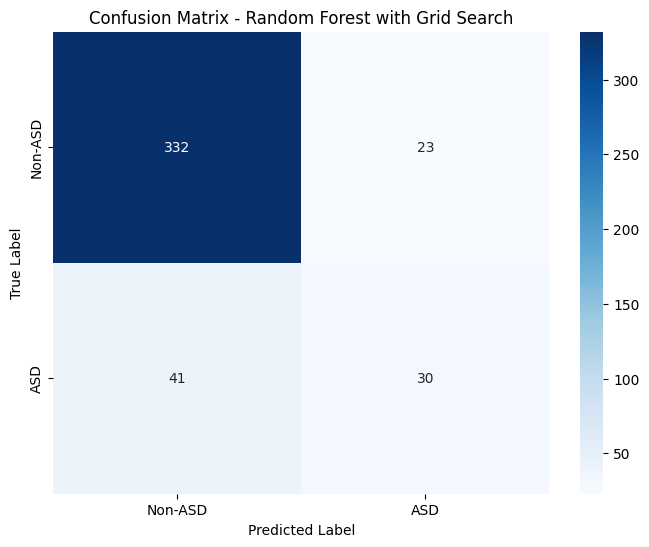

Applying SMOTE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of components retained: 5


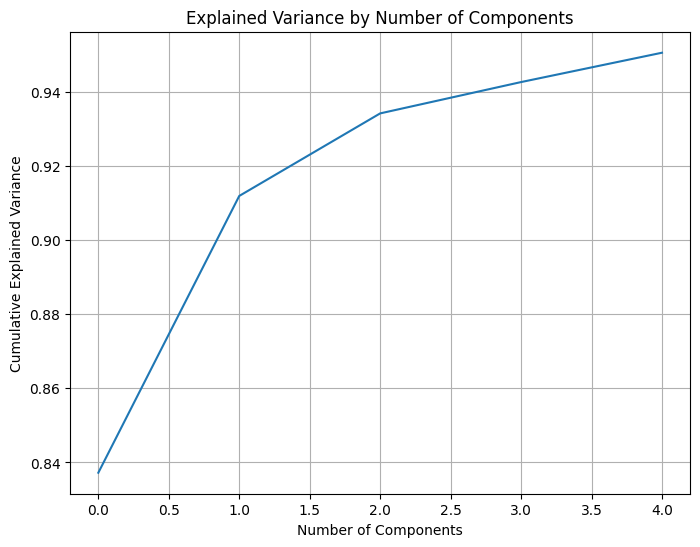

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Lasso Feature Selection
Accuracy: 0.7700
MCC: 0.4118
AUC ROC: 0.8069
F1 Score: 0.5149
Sensitivity: 0.7324
Specificity: 0.7324
G Mean: 0.7324
----------------------------------------


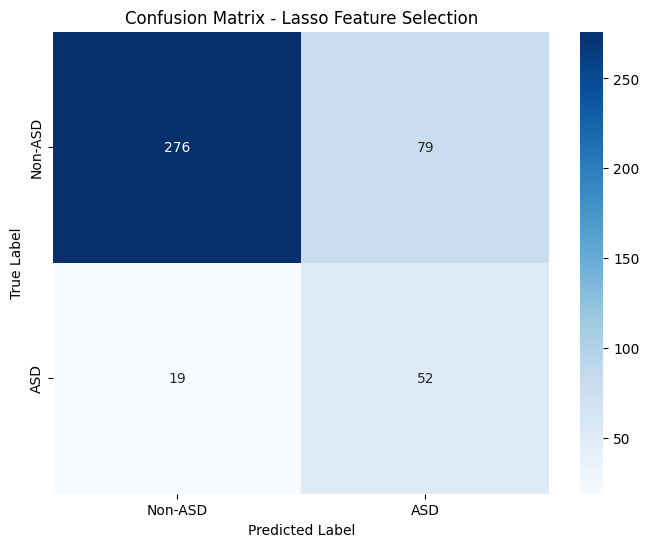

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random Forest Feature Selection
Accuracy: 0.7559
MCC: 0.3933
AUC ROC: 0.8325
F1 Score: 0.5000
Sensitivity: 0.7324
Specificity: 0.7324
G Mean: 0.7324
----------------------------------------


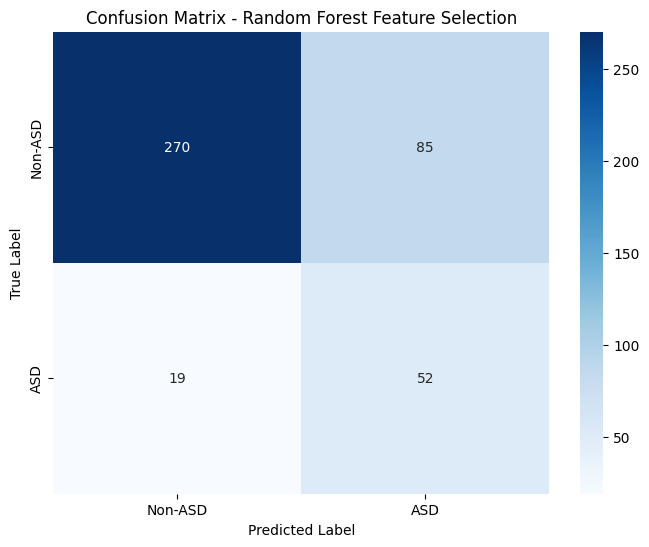

Model: PCA
Accuracy: 0.7300
MCC: 0.3999
AUC ROC: 0.8079
F1 Score: 0.4978
Sensitivity: 0.8028
Specificity: 0.8028
G Mean: 0.8028
----------------------------------------


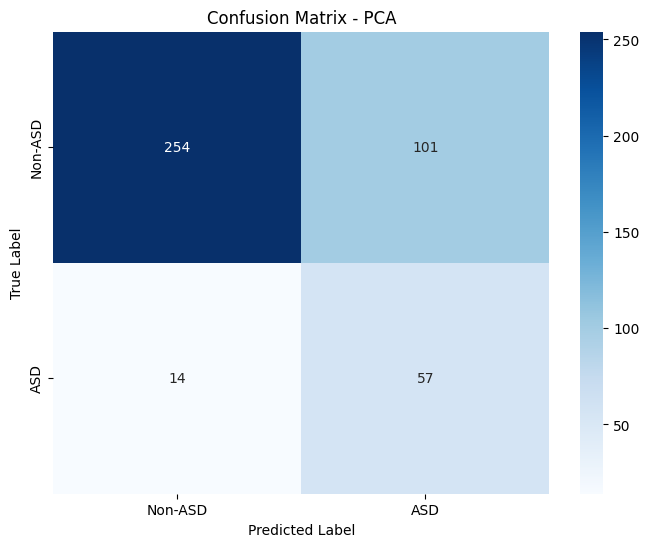

Model: Random Forest with Grid Search
Accuracy: 0.8169
MCC: 0.4124
AUC ROC: 0.8357
F1 Score: 0.5185
Sensitivity: 0.5915
Specificity: 0.5915
G Mean: 0.5915
----------------------------------------


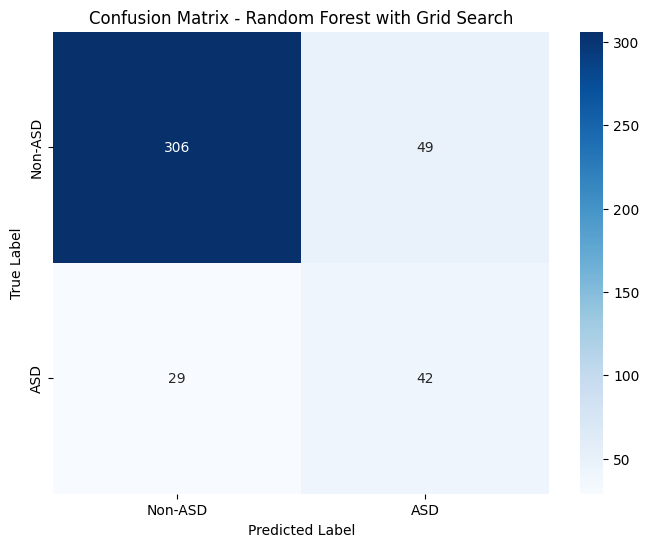

Applying ADASYN


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of components retained: 6


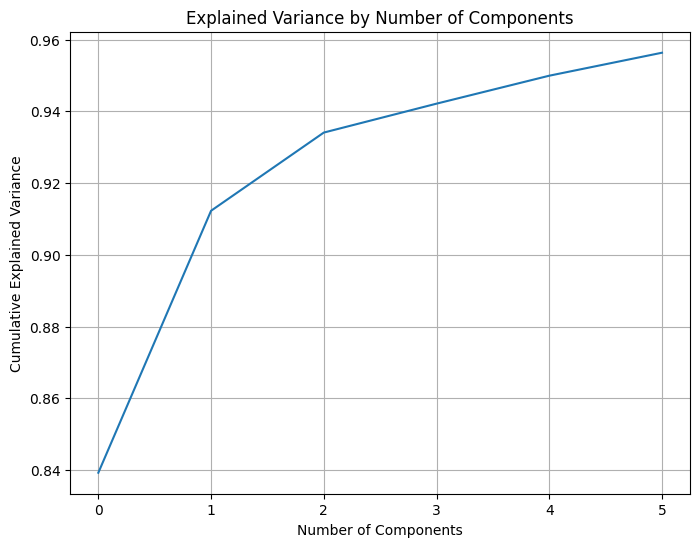

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Lasso Feature Selection
Accuracy: 0.7488
MCC: 0.3617
AUC ROC: 0.7831
F1 Score: 0.4780
Sensitivity: 0.6901
Specificity: 0.6901
G Mean: 0.6901
----------------------------------------


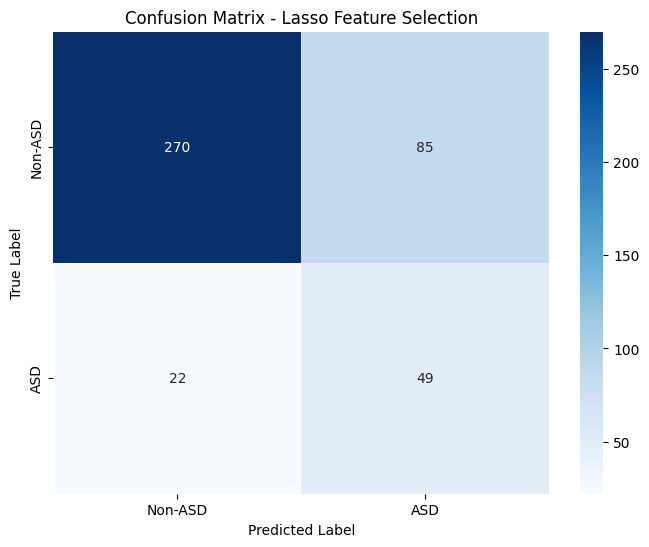

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random Forest Feature Selection
Accuracy: 0.7441
MCC: 0.3252
AUC ROC: 0.8085
F1 Score: 0.4523
Sensitivity: 0.6338
Specificity: 0.6338
G Mean: 0.6338
----------------------------------------


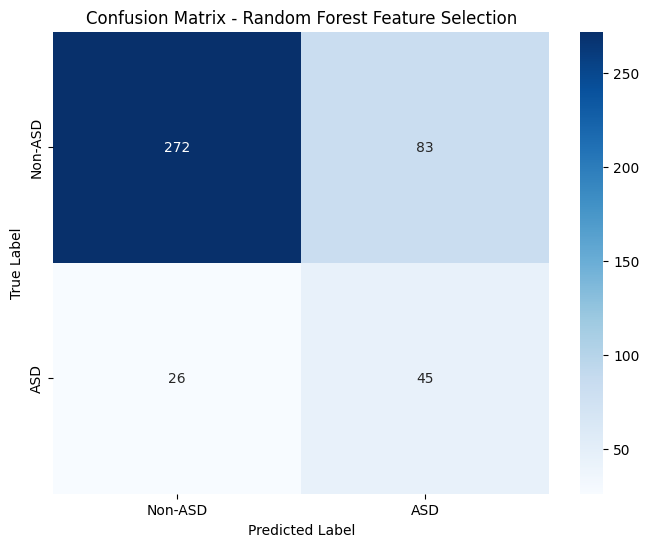

Model: PCA
Accuracy: 0.7394
MCC: 0.4108
AUC ROC: 0.8024
F1 Score: 0.5067
Sensitivity: 0.8028
Specificity: 0.8028
G Mean: 0.8028
----------------------------------------


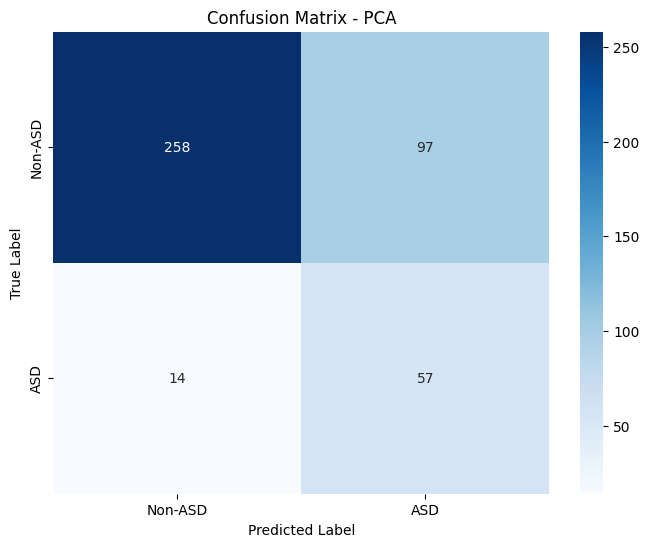

Model: Random Forest with Grid Search
Accuracy: 0.8146
MCC: 0.4152
AUC ROC: 0.8323
F1 Score: 0.5212
Sensitivity: 0.6056
Specificity: 0.6056
G Mean: 0.6056
----------------------------------------


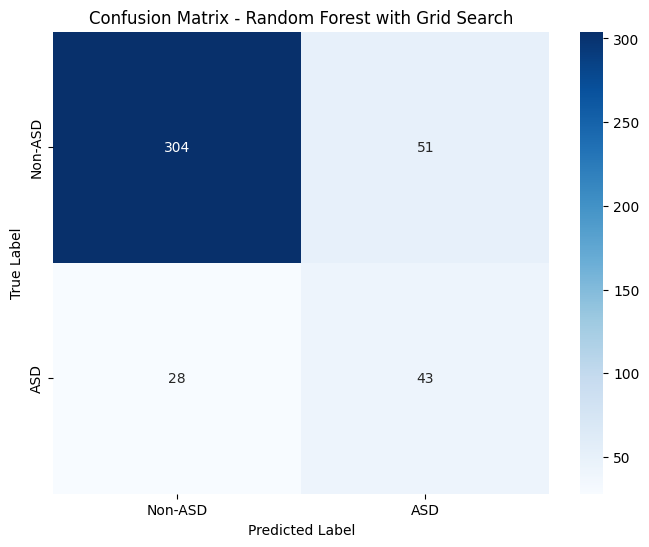

ValueError: X has 524 features, but RandomForestClassifier is expecting 157 features as input.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, matthews_corrcoef, roc_auc_score, f1_score,
                             confusion_matrix, recall_score)
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer


# Load the dataset
file_path = '/content/Supplementary_Tables.xlsx'
df = pd.read_excel(file_path, sheet_name='Supplementary Table S1')

# Separate the target variable and the feature set
genes = df['Gene']
X = df.drop(columns=['Gene', 'Ensembl ID', 'Gene Type'])  # Dropping only non-feature columns that aren't useful for prediction
Y = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)  # Assuming 'Gene Type' is the target

# Save feature names for later
feature_names = X.columns

# Function to trim feature names
def trim_feature_name(name):
    # Define the logic to trim the feature name
    # For example, keeping only the prefix up to the second underscore
    parts = name.split('_')
    if len(parts) > 2:
        return f"{parts[0]}_{parts[1]}"
    else:
        return name  # Return as is if the format is unexpected

# Apply the function to all feature names
trimmed_feature_names = [trim_feature_name(name) for name in feature_names]

# Update the feature names in the dataset
X.columns = trimmed_feature_names

# Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, genes_train, genes_test = train_test_split(X, Y, genes, test_size=0.2, random_state=42)

# Define sampling techniques
def apply_sampling(X_train, y_train, technique):
    if technique == 'RandomOverSampler':
        sampler = RandomOverSampler(random_state=42)
    elif technique == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif technique == 'ADASYN':
        sampler = ADASYN(random_state=42)
    else:
        raise ValueError("Unknown sampling technique")

    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled

# Define feature selection methods
def lasso_feature_selection(X_train, y_train, X_test, feature_names):
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Define PCA transformation and fit on data
def fit_pca(X_train, X_test):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    # Find out how many components were selected
    num_components = pca.n_components_
    print(f"Number of components retained: {num_components}")

    # Plot the cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_train_pca, X_test_pca

# Evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, model_name, feature_names):
    if model_name == "Random Forest with Grid Search":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-ASD', 'ASD'], yticklabels=['Non-ASD', 'ASD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return model

# Sampling techniques to apply
sampling_techniques = ['RandomOverSampler', 'SMOTE', 'ADASYN']

for technique in sampling_techniques:
    print(f"Applying {technique}")

    # Apply sampling technique
    X_train_resampled, y_train_resampled = apply_sampling(X_train, y_train, technique)

    # Apply feature selection methods
    X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train_resampled, y_train_resampled, X_test, trimmed_feature_names)
    X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train_resampled, y_train_resampled, X_test, trimmed_feature_names)

    # Apply PCA
    X_train_pca, X_test_pca = fit_pca(X_train_resampled, X_test)
    pca_feature_names = [f"PCA Component {i+1}" for i in range(X_train_pca.shape[1])]

    # Define models with trimmed feature names
    models = {
        "Lasso Feature Selection": (X_train_lasso, X_test_lasso, lasso_feature_names),
        "Random Forest Feature Selection": (X_train_rf, X_test_rf, rf_feature_names),
        "PCA": (X_train_pca, X_test_pca, pca_feature_names),
        "Random Forest with Grid Search": (X_train_rf, X_test_rf, rf_feature_names)
    }

    for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
        model = evaluate_model(X_train_fs, X_test_fs, y_train_resampled, y_test, name, fs_feature_names)


# Set up the LIME explainer
explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=trimmed_feature_names,
                                 class_names=['Non-ASD', 'ASD'],
                                 discretize_continuous=True)

# Function to get explanations from LIME
def get_lime_explanations(X_test, model, num_instances=100):
    lime_weights = pd.DataFrame(index=range(num_instances), columns=trimmed_feature_names)

    for i in range(num_instances):
        exp = explainer.explain_instance(X_test.iloc[i].values, model.predict_proba, num_features=len(trimmed_feature_names))
        exp_map = dict(exp.as_list())
        for feature in trimmed_feature_names:
            lime_weights.at[i, feature] = exp_map.get(feature, 0)

    return lime_weights

# Get explanations for a subset of the test data
num_instances_to_explain = 100  # You can adjust this number based on your test set size
lime_weights = get_lime_explanations(X_test, model, num_instances=num_instances_to_explain)

# Calculate the mean importance of each feature across all explained instances
mean_importances = lime_weights.abs().mean().sort_values(ascending=False)

# Plot the top 10 most important features
top_features = mean_importances.head(10)
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Most Influential Features According to LIME')
plt.ylabel('Average Absolute Contribution to Model Prediction')
plt.show()

# Optionally, print out the top features for inspection
print("Top 10 influential brain structures/features:")
print(top_features)

Applying RandomOverSampler


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of components retained: 7


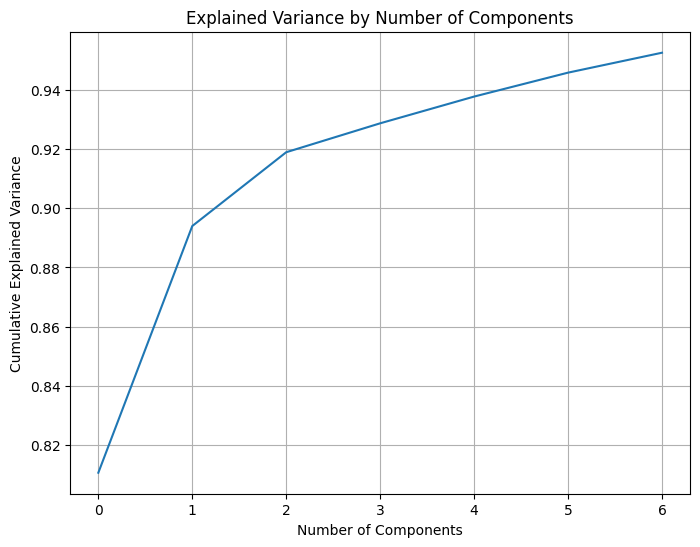

Applying SMOTE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of components retained: 5


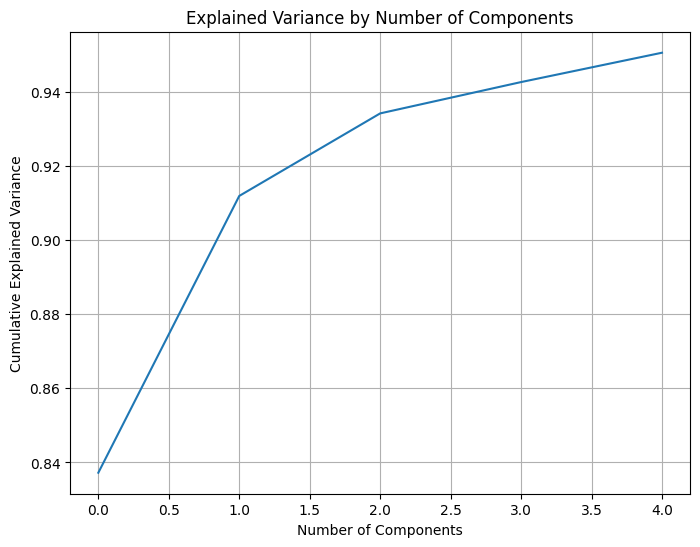

Applying ADASYN


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of components retained: 6


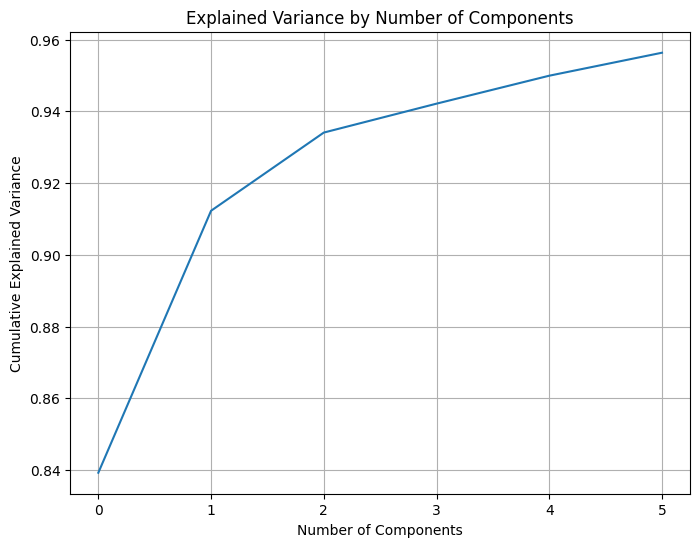

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Lasso Feature Selection
Accuracy: 0.7488
MCC: 0.3617
AUC ROC: 0.7831
F1 Score: 0.4780
Sensitivity: 0.6901
Specificity: 0.6901
G Mean: 0.6901
----------------------------------------


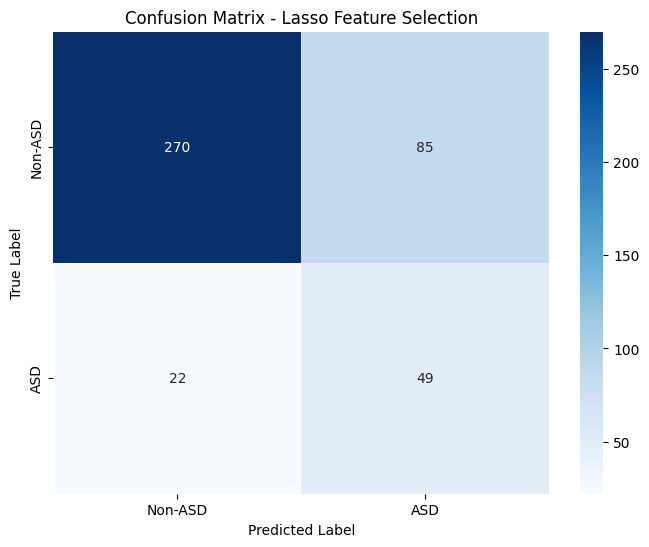

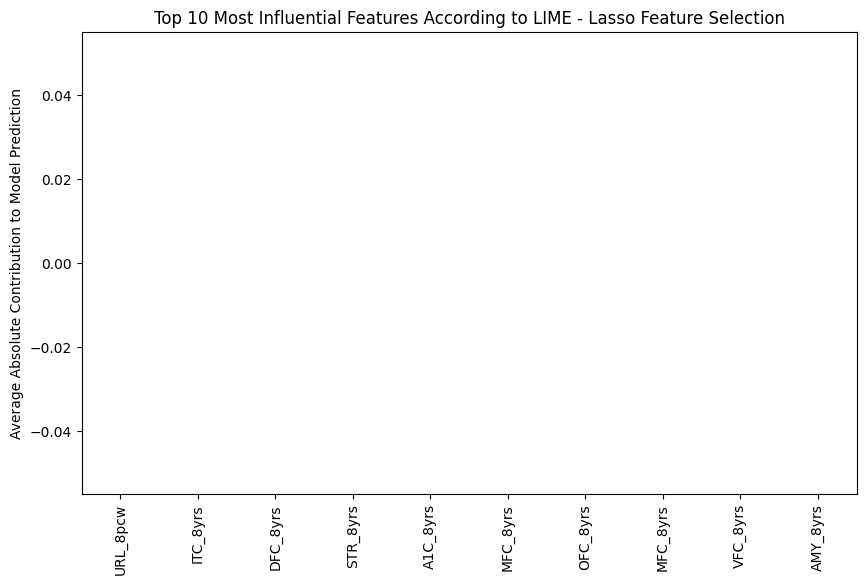

Top 10 influential brain structures/features according to LIME for Lasso Feature Selection:
URL_8pcw    0.0
ITC_8yrs    0.0
DFC_8yrs    0.0
STR_8yrs    0.0
A1C_8yrs    0.0
MFC_8yrs    0.0
OFC_8yrs    0.0
MFC_8yrs    0.0
VFC_8yrs    0.0
AMY_8yrs    0.0
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random Forest Feature Selection
Accuracy: 0.7441
MCC: 0.3252
AUC ROC: 0.8085
F1 Score: 0.4523
Sensitivity: 0.6338
Specificity: 0.6338
G Mean: 0.6338
----------------------------------------


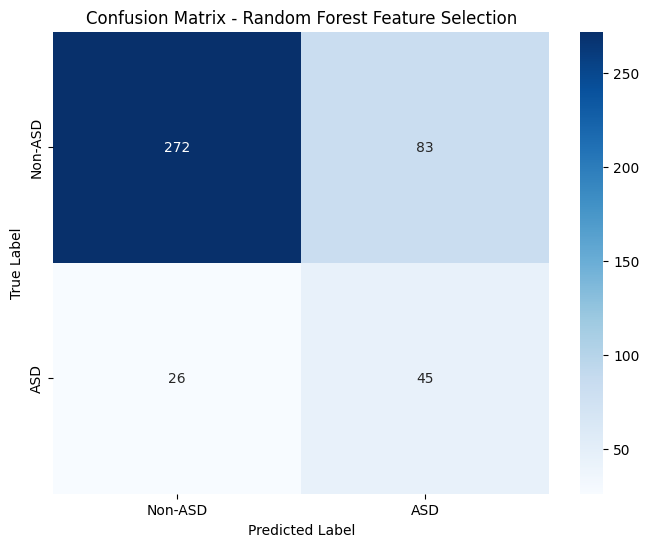

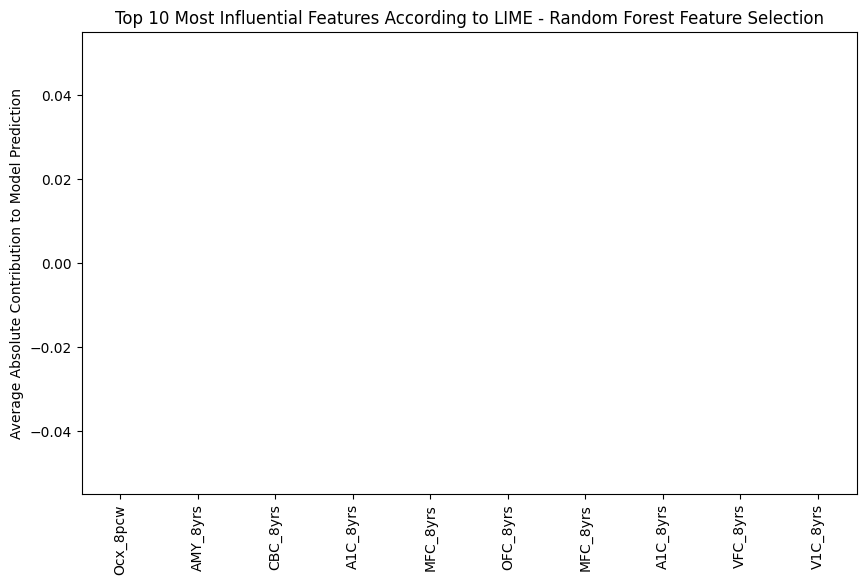

Top 10 influential brain structures/features according to LIME for Random Forest Feature Selection:
Ocx_8pcw    0.0
AMY_8yrs    0.0
CBC_8yrs    0.0
A1C_8yrs    0.0
MFC_8yrs    0.0
OFC_8yrs    0.0
MFC_8yrs    0.0
A1C_8yrs    0.0
VFC_8yrs    0.0
V1C_8yrs    0.0
dtype: object
Model: PCA
Accuracy: 0.7394
MCC: 0.4108
AUC ROC: 0.8024
F1 Score: 0.5067
Sensitivity: 0.8028
Specificity: 0.8028
G Mean: 0.8028
----------------------------------------


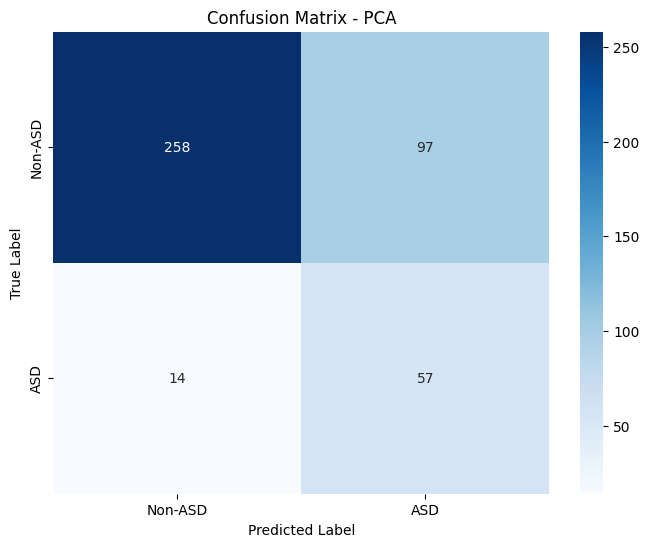

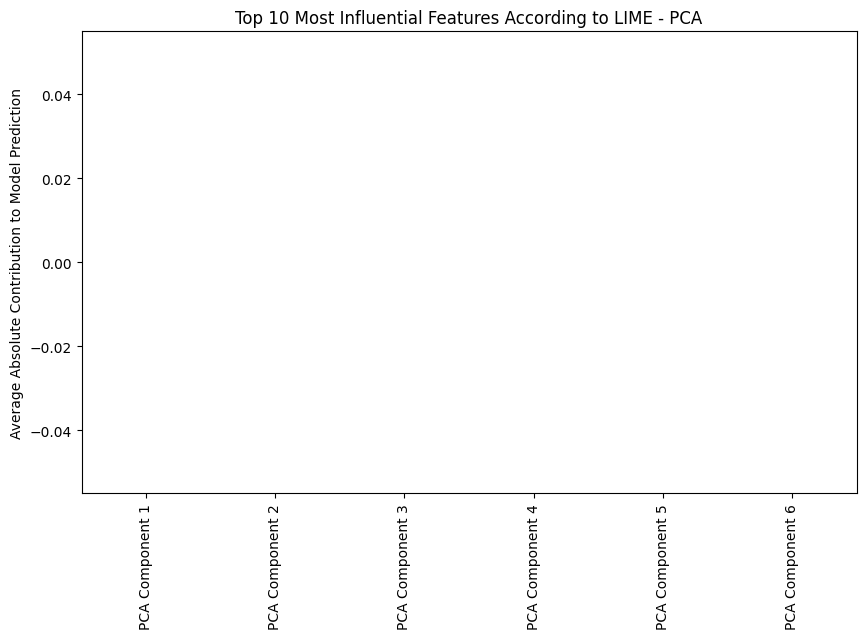

Top 10 influential brain structures/features according to LIME for PCA:
PCA Component 1    0.0
PCA Component 2    0.0
PCA Component 3    0.0
PCA Component 4    0.0
PCA Component 5    0.0
PCA Component 6    0.0
dtype: object
Model: Random Forest with Grid Search
Accuracy: 0.8146
MCC: 0.4152
AUC ROC: 0.8323
F1 Score: 0.5212
Sensitivity: 0.6056
Specificity: 0.6056
G Mean: 0.6056
----------------------------------------


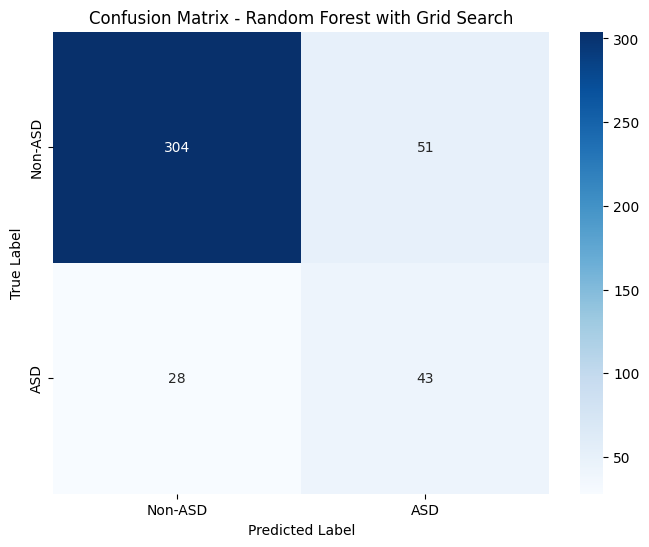

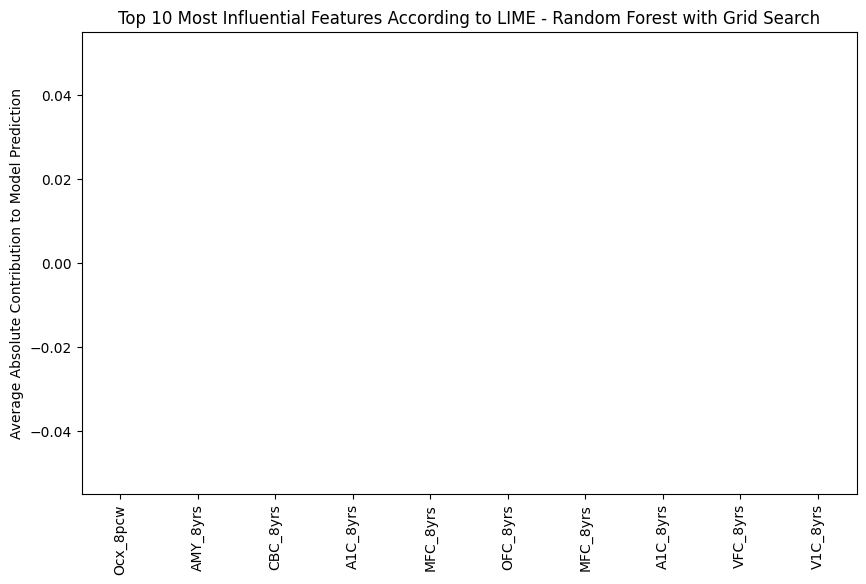

Top 10 influential brain structures/features according to LIME for Random Forest with Grid Search:
Ocx_8pcw    0.0
AMY_8yrs    0.0
CBC_8yrs    0.0
A1C_8yrs    0.0
MFC_8yrs    0.0
OFC_8yrs    0.0
MFC_8yrs    0.0
A1C_8yrs    0.0
VFC_8yrs    0.0
V1C_8yrs    0.0
dtype: object


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, matthews_corrcoef, roc_auc_score, f1_score,
                             confusion_matrix, recall_score)
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from lime.lime_tabular import LimeTabularExplainer

# Load the dataset
file_path = '/content/Supplementary_Tables.xlsx'
df = pd.read_excel(file_path, sheet_name='Supplementary Table S1')

# Separate the target variable and the feature set
genes = df['Gene']
X = df.drop(columns=['Gene', 'Ensembl ID', 'Gene Type'])  # Dropping only non-feature columns that aren't useful for prediction
Y = df['Gene Type'].apply(lambda x: 1 if x == 'ASD' else 0)  # Assuming 'Gene Type' is the target

# Save feature names for later
feature_names = X.columns

# Function to trim feature names
def trim_feature_name(name):
    parts = name.split('_')
    if len(parts) > 2:
        return f"{parts[0]}_{parts[1]}"
    else:
        return name  # Return as is if the format is unexpected

# Apply the function to all feature names
trimmed_feature_names = [trim_feature_name(name) for name in feature_names]

# Update the feature names in the dataset
X.columns = trimmed_feature_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, genes_train, genes_test = train_test_split(X, Y, genes, test_size=0.2, random_state=42)

# Define sampling techniques
def apply_sampling(X_train, y_train, technique):
    if technique == 'RandomOverSampler':
        sampler = RandomOverSampler(random_state=42)
    elif technique == 'SMOTE':
        sampler = SMOTE(random_state=42)
    elif technique == 'ADASYN':
        sampler = ADASYN(random_state=42)
    else:
        raise ValueError("Unknown sampling technique")

    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
    return X_train_resampled, y_train_resampled

# Define feature selection methods
def lasso_feature_selection(X_train, y_train, X_test, feature_names):
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
    lasso_model.fit(X_train, y_train)
    selector = SelectFromModel(lasso_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

def rf_feature_selection(X_train, y_train, X_test, feature_names):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    selector = SelectFromModel(rf_model, threshold='mean')
    selected_indices = selector.get_support(indices=True)
    return selector.transform(X_train), selector.transform(X_test), [feature_names[i] for i in selected_indices]

# Define PCA transformation and fit on data
def fit_pca(X_train, X_test):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    # Find out how many components were selected
    num_components = pca.n_components_
    print(f"Number of components retained: {num_components}")

    # Plot the cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_train_pca, X_test_pca

# Evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, model_name, feature_names):
    if model_name == "Random Forest with Grid Search":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid,
                                   cv=5,
                                   scoring='accuracy')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if conf_matrix[1, 1] + conf_matrix[1, 0] != 0 else 0
    g_mean = (sensitivity * specificity) ** 0.5

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC ROC: {roc_auc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"G Mean: {g_mean:.4f}")
    print("-" * 40)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-ASD', 'ASD'], yticklabels=['Non-ASD', 'ASD'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    return model

# Sampling techniques to apply
sampling_techniques = ['RandomOverSampler', 'SMOTE', 'ADASYN']

for technique in sampling_techniques:
    print(f"Applying {technique}")

    # Apply sampling technique
    X_train_resampled, y_train_resampled = apply_sampling(X_train, y_train, technique)

    # Apply feature selection methods
    X_train_lasso, X_test_lasso, lasso_feature_names = lasso_feature_selection(X_train_resampled, y_train_resampled, X_test, trimmed_feature_names)
    X_train_rf, X_test_rf, rf_feature_names = rf_feature_selection(X_train_resampled, y_train_resampled, X_test, trimmed_feature_names)

    # Apply PCA
    X_train_pca, X_test_pca = fit_pca(X_train_resampled, X_test)
    pca_feature_names = [f"PCA Component {i+1}" for i in range(X_train_pca.shape[1])]

    # Define models with trimmed feature names
    models = {
        "Lasso Feature Selection": (X_train_lasso, X_test_lasso, lasso_feature_names),
        "Random Forest Feature Selection": (X_train_rf, X_test_rf, rf_feature_names),
        "PCA": (X_train_pca, X_test_pca, pca_feature_names),
        "Random Forest with Grid Search": (X_train_rf, X_test_rf, rf_feature_names)
    }

    # Function to get explanations from LIME
def get_lime_explanations(X_test_fs, model, feature_names, num_instances=100):
    # Create the LIME explainer with the appropriate feature set
    explainer = LimeTabularExplainer(X_test_fs,  # Passed as values for the LIME explainer
                                     feature_names=feature_names,
                                     class_names=['Non-ASD', 'ASD'],
                                     discretize_continuous=True)

    lime_weights = pd.DataFrame(index=range(num_instances), columns=feature_names)

    for i in range(num_instances):
        exp = explainer.explain_instance(X_test_fs[i], model.predict_proba, num_features=len(feature_names))
        exp_map = dict(exp.as_list())
        for feature in feature_names:
            lime_weights.at[i, feature] = exp_map.get(feature, 0)

    return lime_weights

# Update the loop to correctly pass the arguments:
for name, (X_train_fs, X_test_fs, fs_feature_names) in models.items():
    model = evaluate_model(X_train_fs, X_test_fs, y_train_resampled, y_test, name, fs_feature_names)

    # Corrected function call
    lime_weights = get_lime_explanations(X_test_fs, model, fs_feature_names, num_instances=100)

    # Calculate the mean importance of each feature across all explained instances
    mean_importances = lime_weights.abs().mean().sort_values(ascending=False)

    # Plot the top 10 most important features
    top_features = mean_importances.head(10)
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='bar')
    plt.title(f'Top 10 Most Influential Features According to LIME - {name}')
    plt.ylabel('Average Absolute Contribution to Model Prediction')
    plt.show()

    # Optionally, print out the top features for inspection
    print(f"Top 10 influential brain structures/features according to LIME for {name}:")
    print(top_features)

